# Perform Clustering(Hierarchical, Kmeans ) for the crime data and identify the number of clusters formed and draw inferences.


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving crime_data.csv to crime_data.csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
%matplotlib inline
sns.set_theme(style='darkgrid')

In [ ]:
df=pd.read_csv("crime_data.csv")
df

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


#EDA

In [ ]:
# Display the first few rows of the dataset
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [ ]:
df.columns

Index(['Unnamed: 0', 'Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

In [ ]:
# Summary statistics of the numerical columns
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [ ]:
df.shape

(50, 5)

In [ ]:
#finding duplicates
df.duplicated().sum()

0

In [ ]:
#finding missing values
df.isnull().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

#Analysing data

Text(0.5, 1.0, 'Correlation Map')

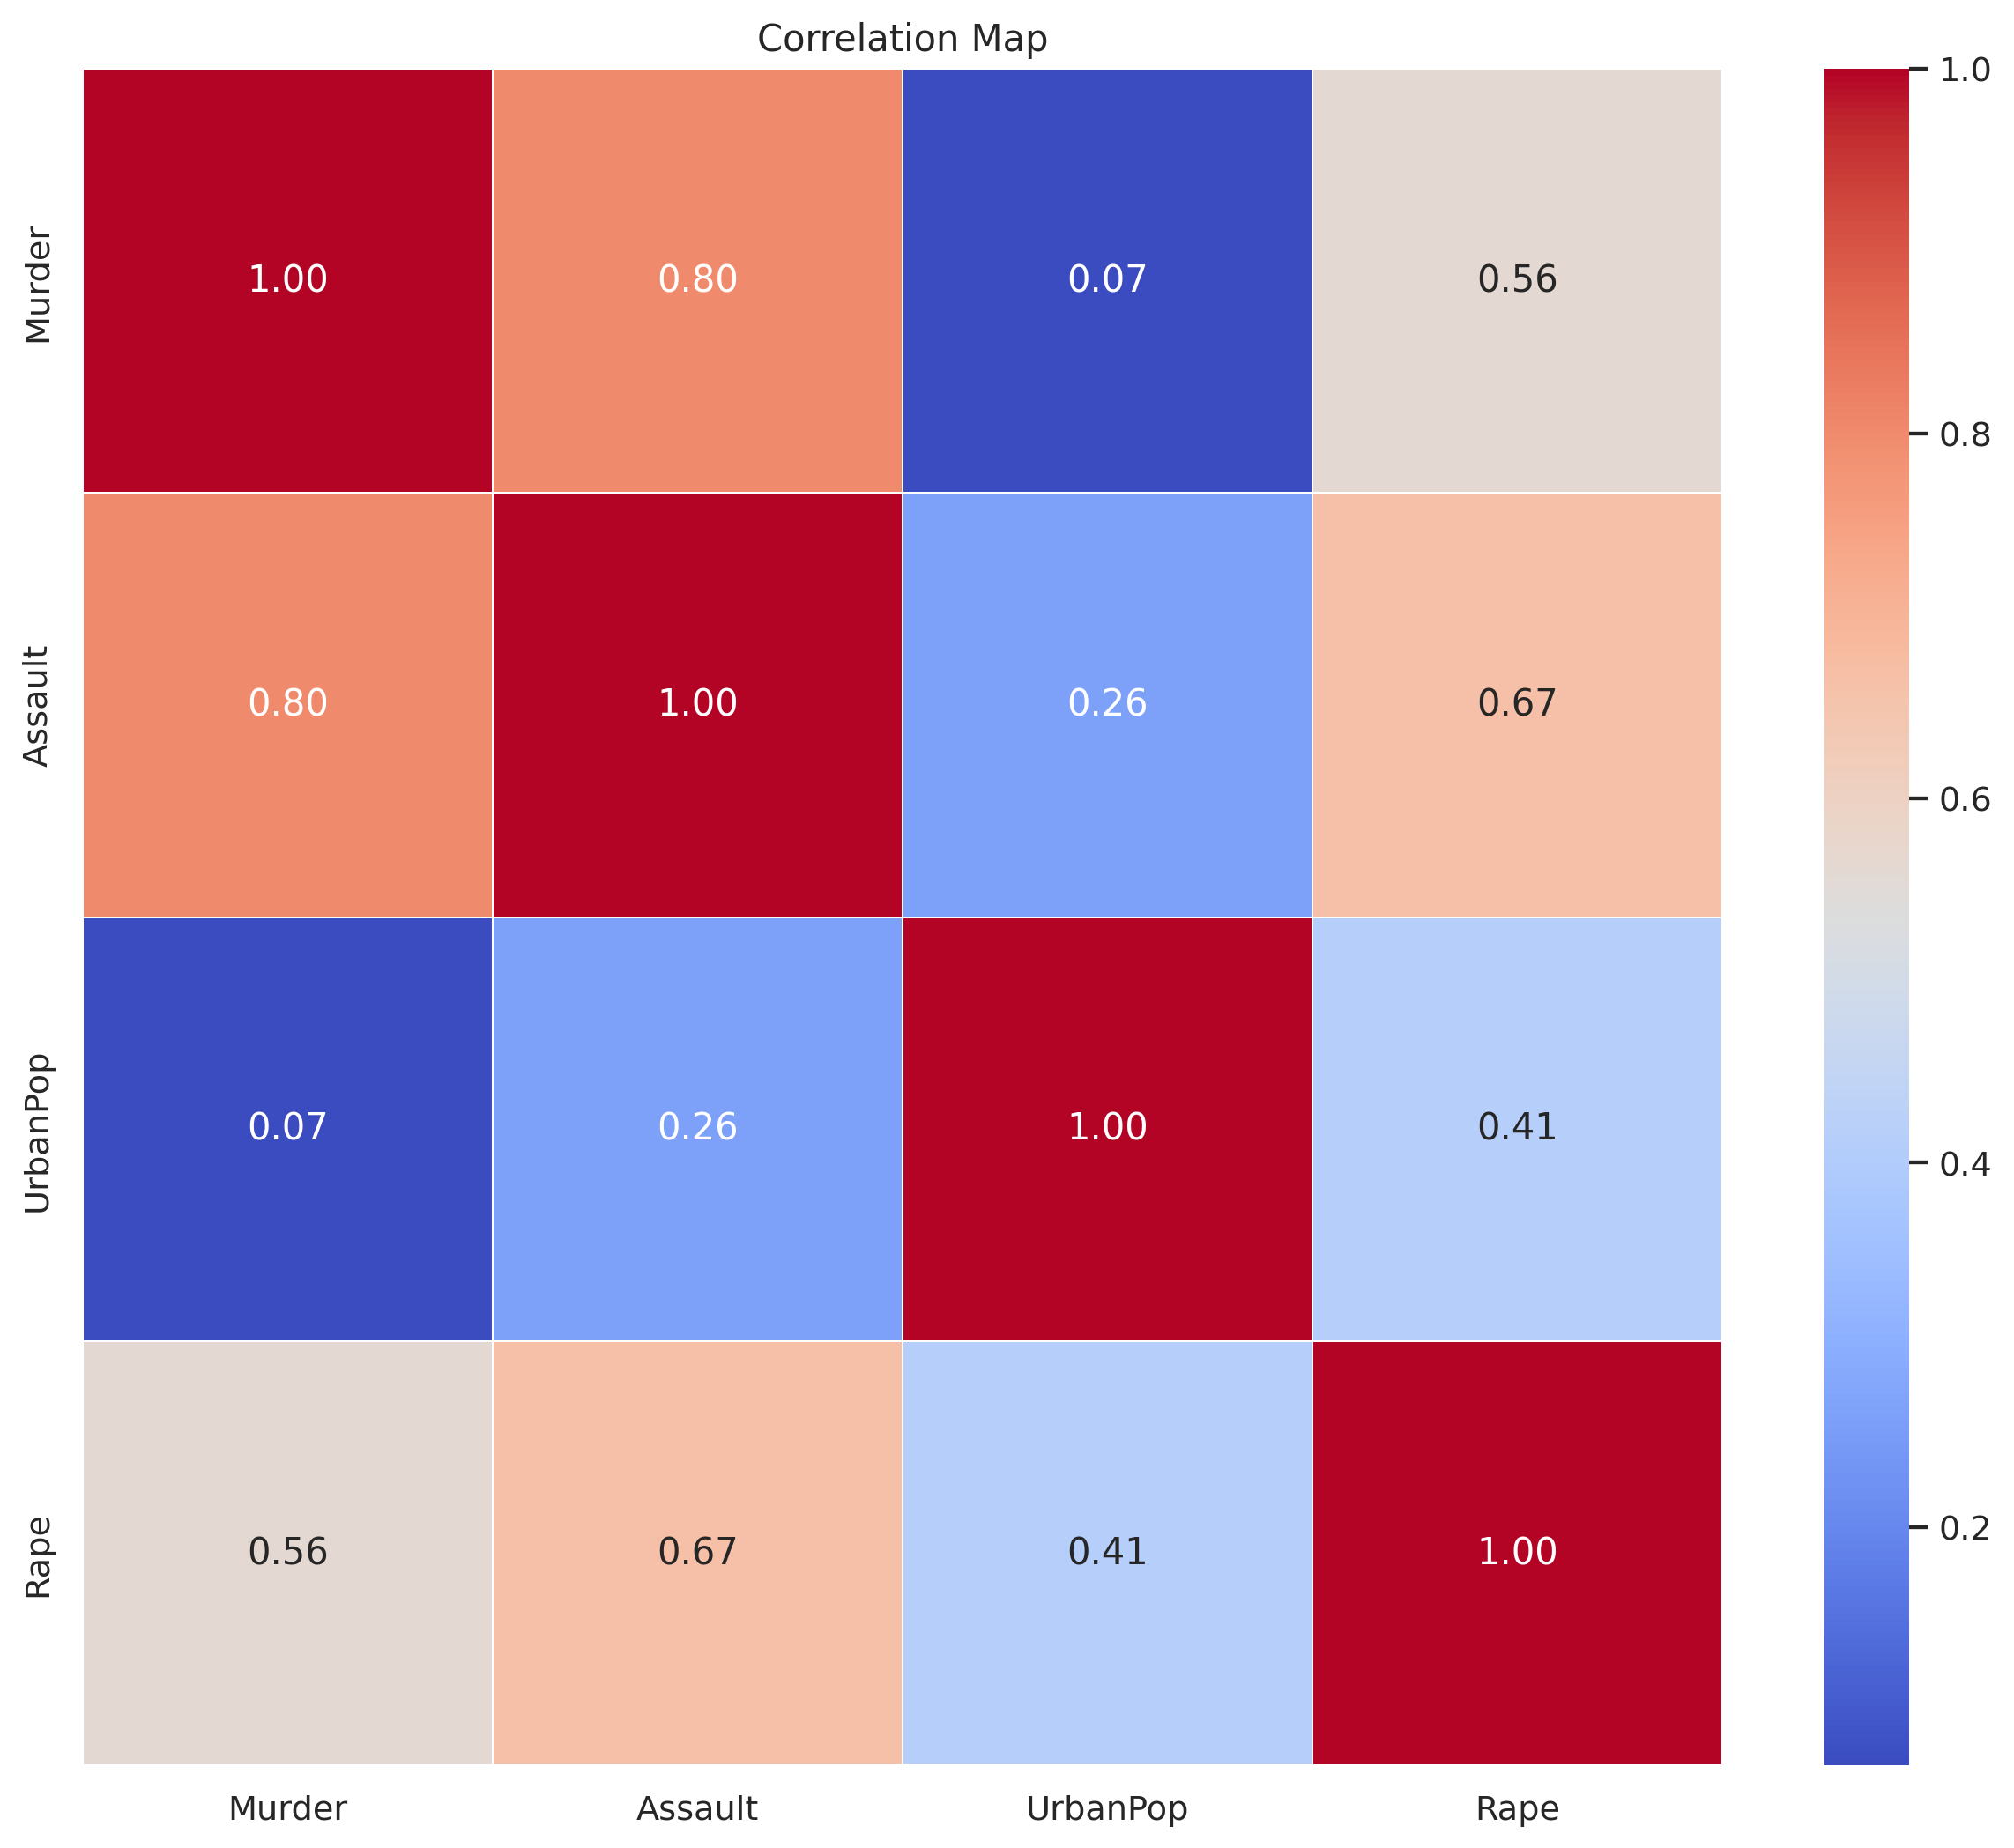

In [ ]:
# Assuming df is your DataFrame containing numerical columns
s = df.select_dtypes(include="number").corr()
# Set up the matplotlib figure
plt.figure(figsize=(12, 10))
# Create a heatmap with a diverging color map and display the correlation coefficients
sns.heatmap(s, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
# Add a title
plt.title("Correlation Map")

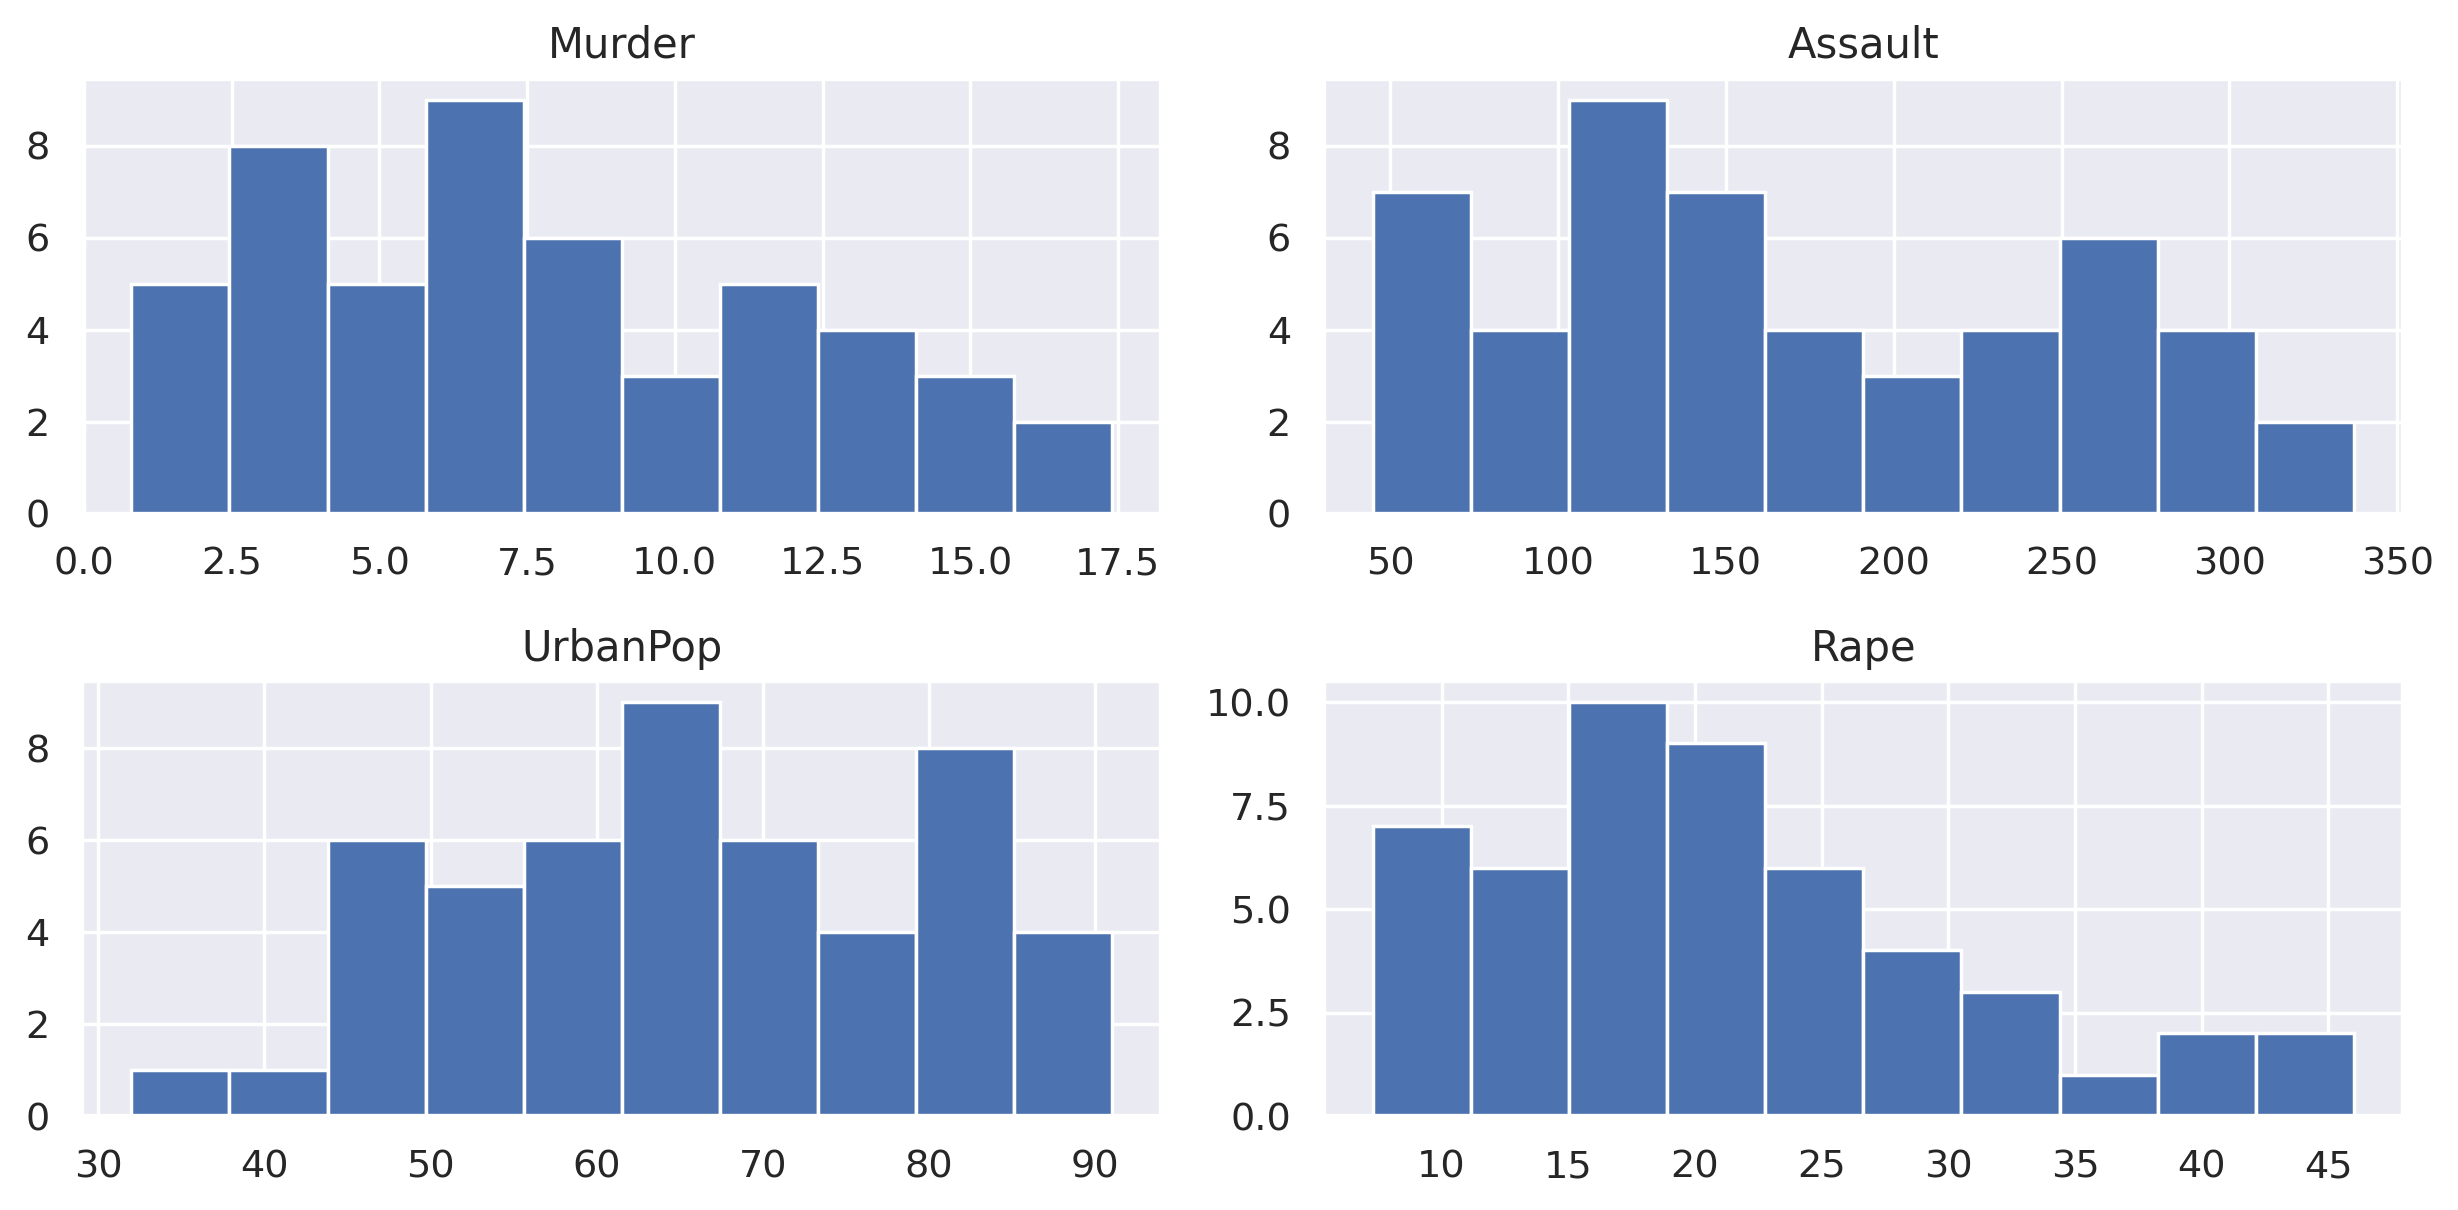

In [ ]:
df.hist()
plt.tight_layout()

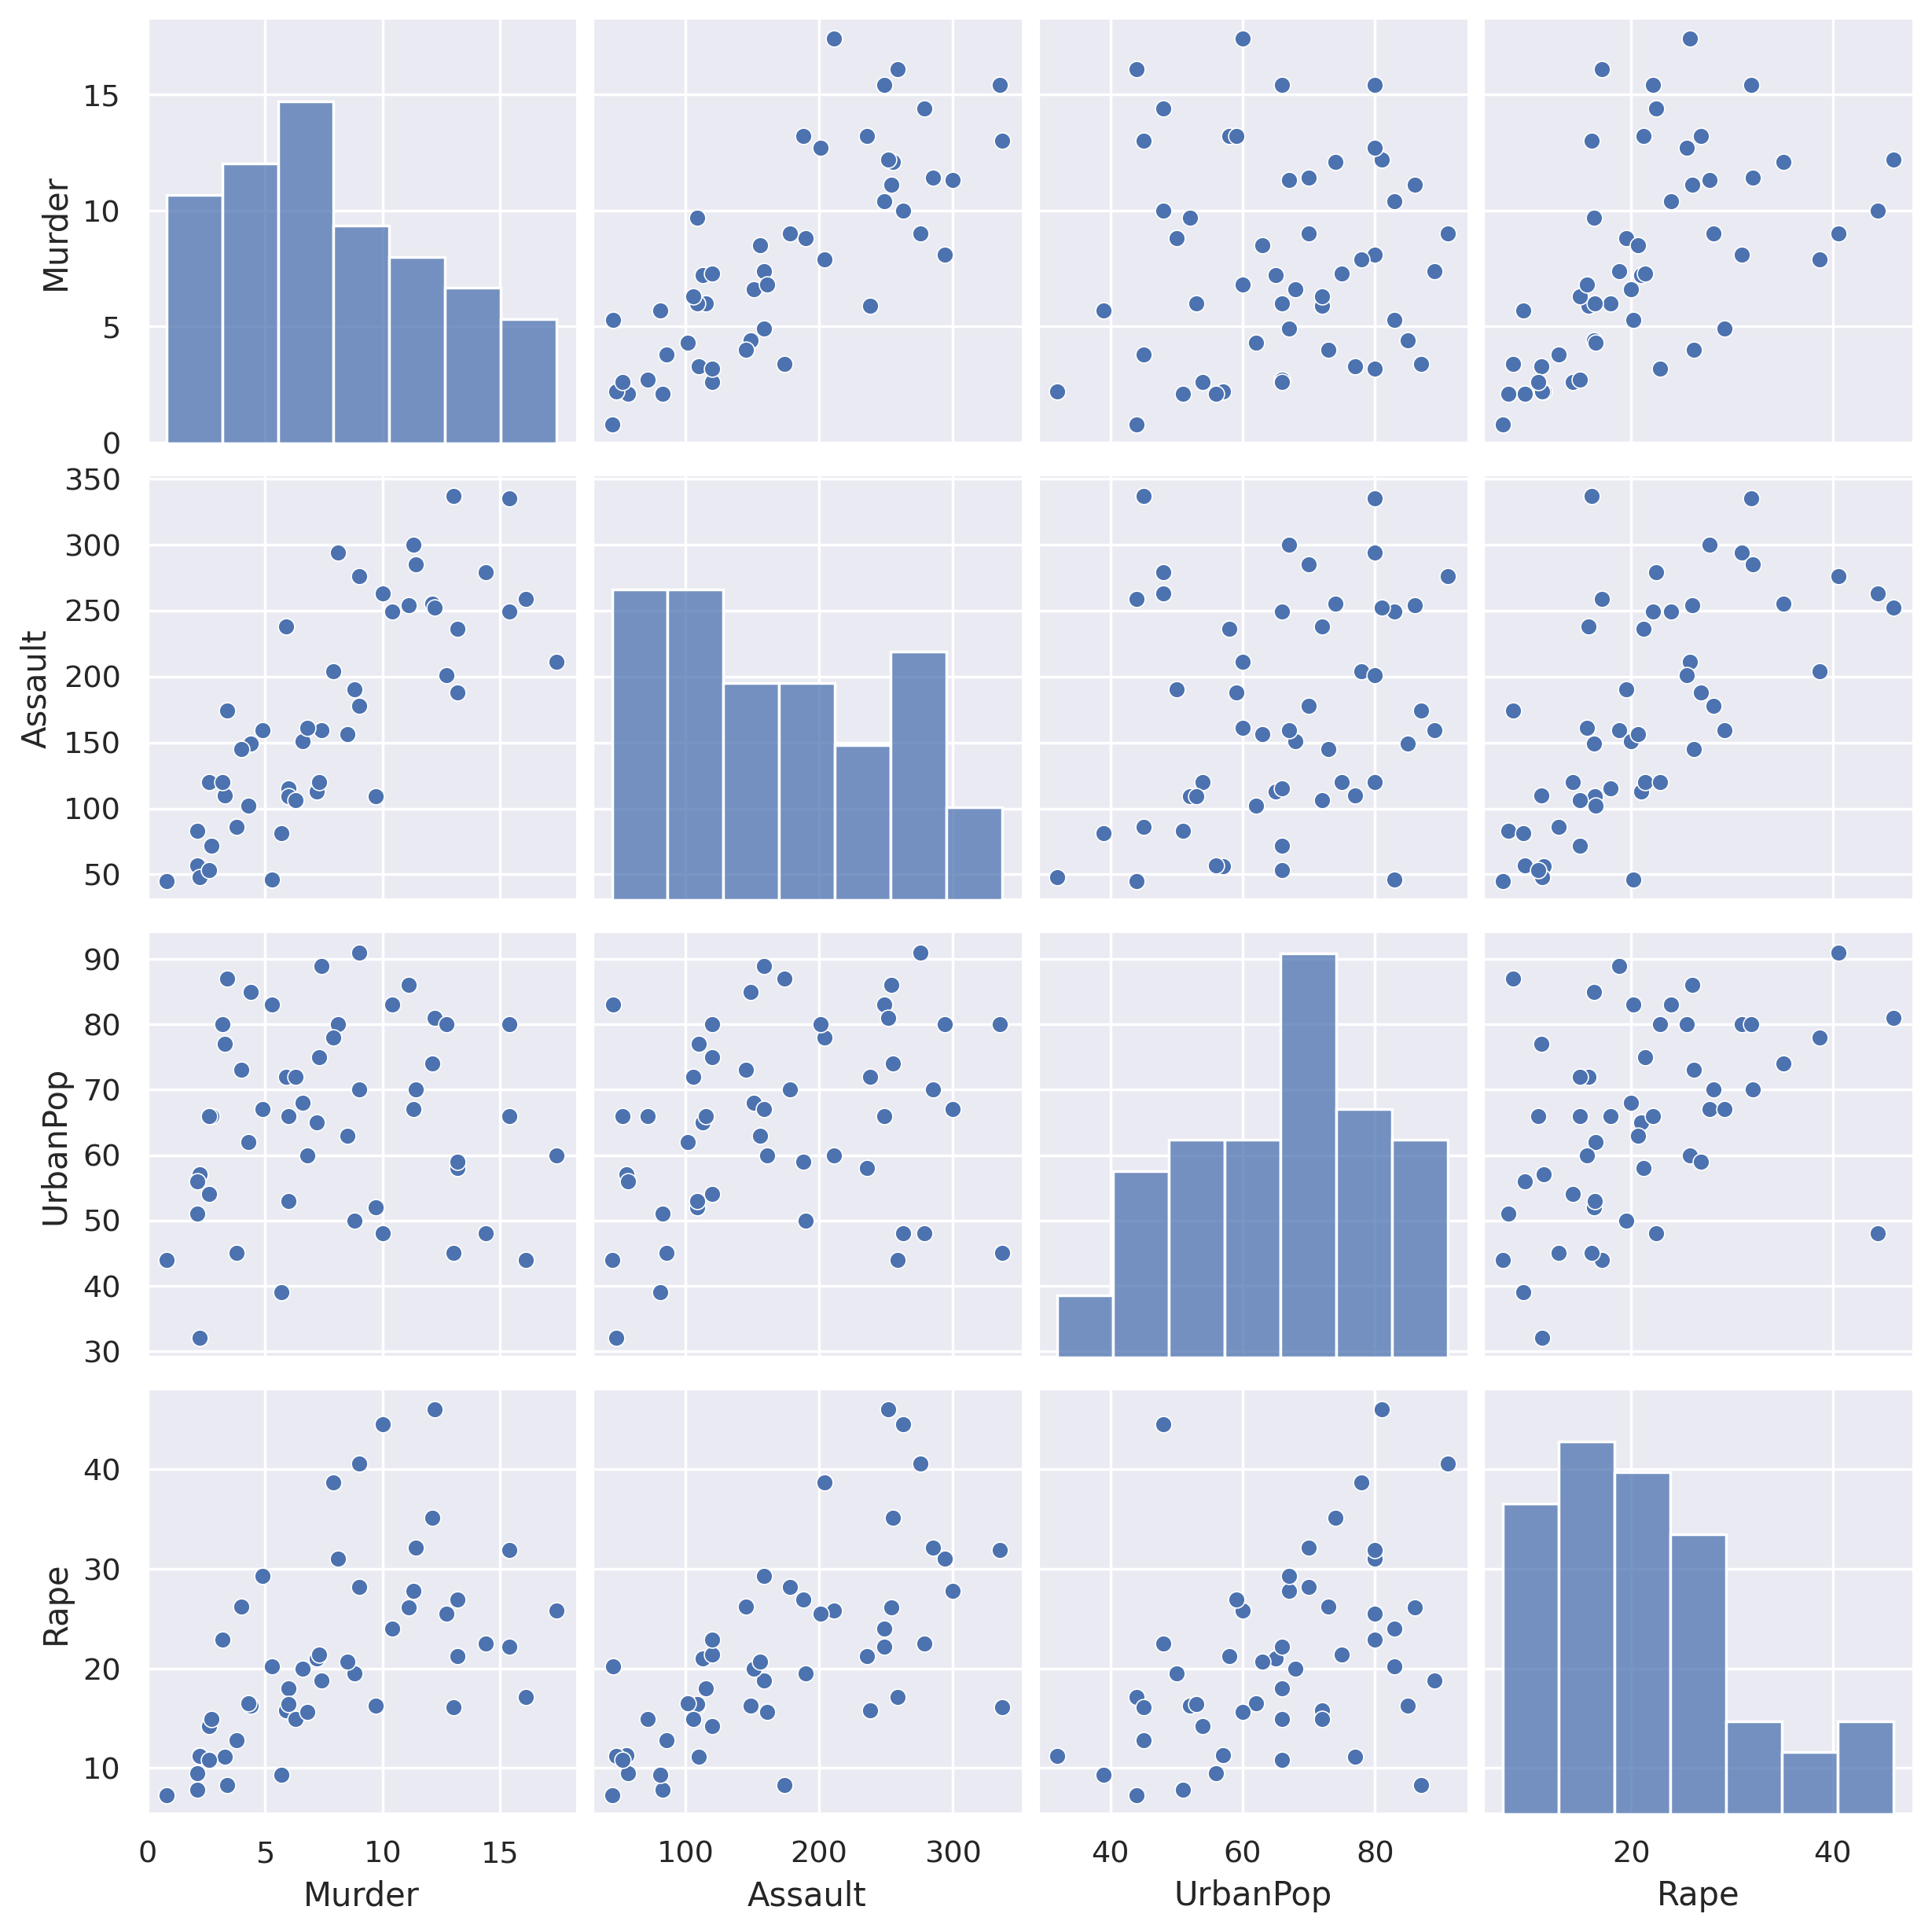

In [ ]:
sns.pairplot(df)

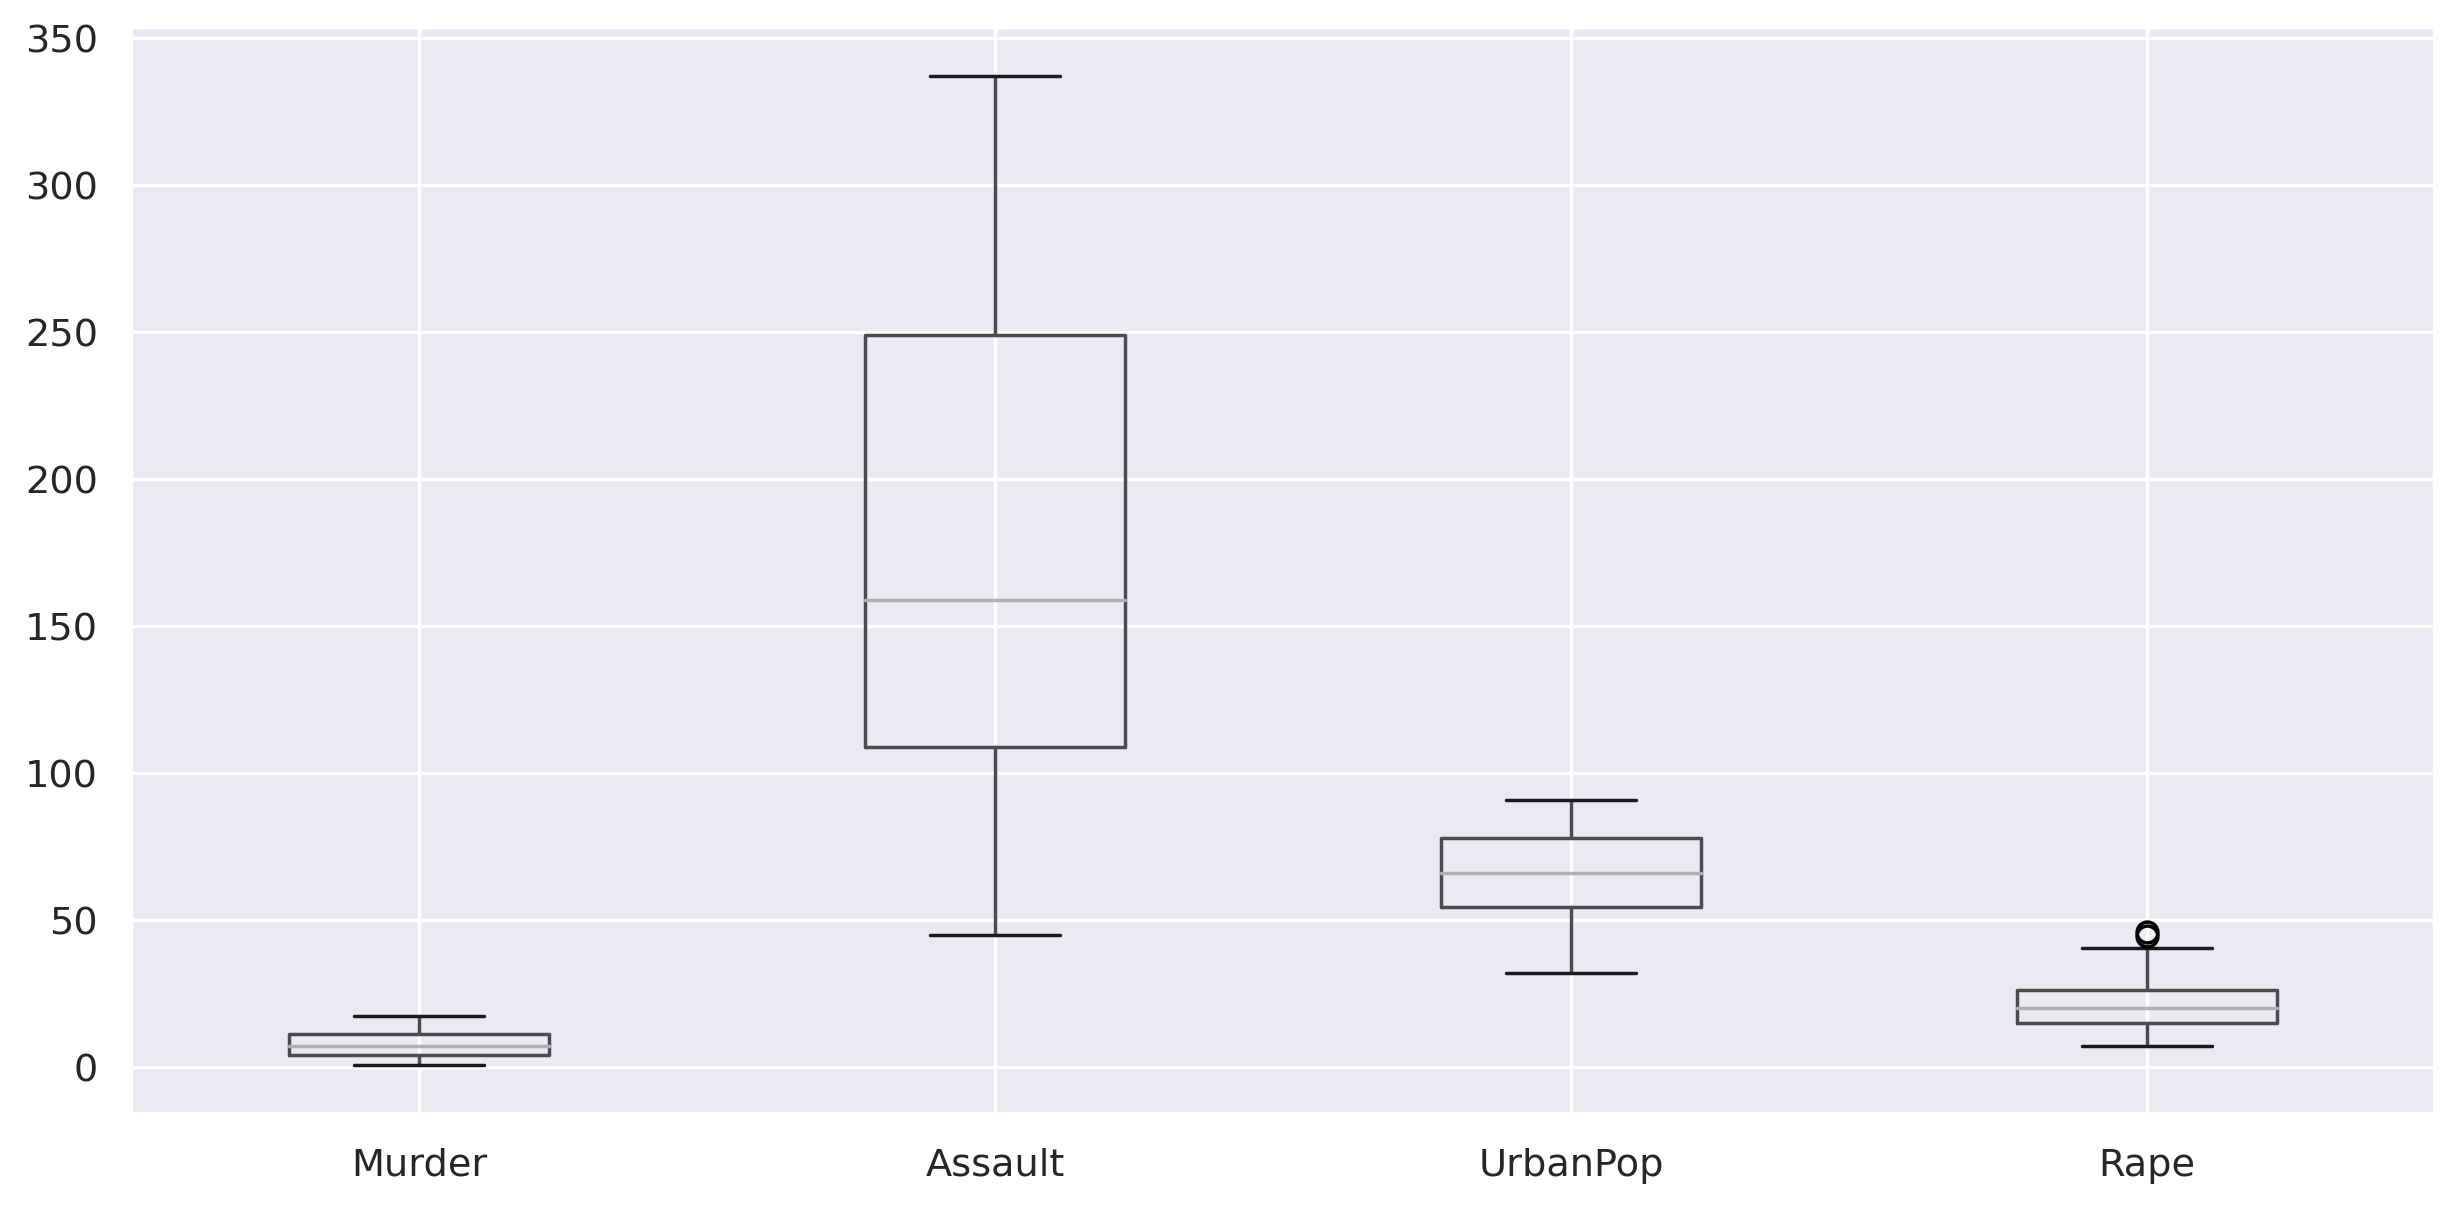

In [ ]:
df.boxplot()
plt.tight_layout()

#To deal with outliers

In [ ]:
df.columns

Index(['Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

In [ ]:
import numpy as np
def calculate_whisker(column):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    iqr = q3 - q1
    lw = q1 - 1.5 * iqr
    uw = q3 + 1.5 * iqr
    return lw, uw

# Loop through the list and replace outliers
for i in ['Rape']:
    lw, uw = calculate_whisker(df[i])
    df[i] = np.where(df[i] < lw, lw, df[i])
    df[i] = np.where(df[i] > uw, uw, df[i])

<Axes: >

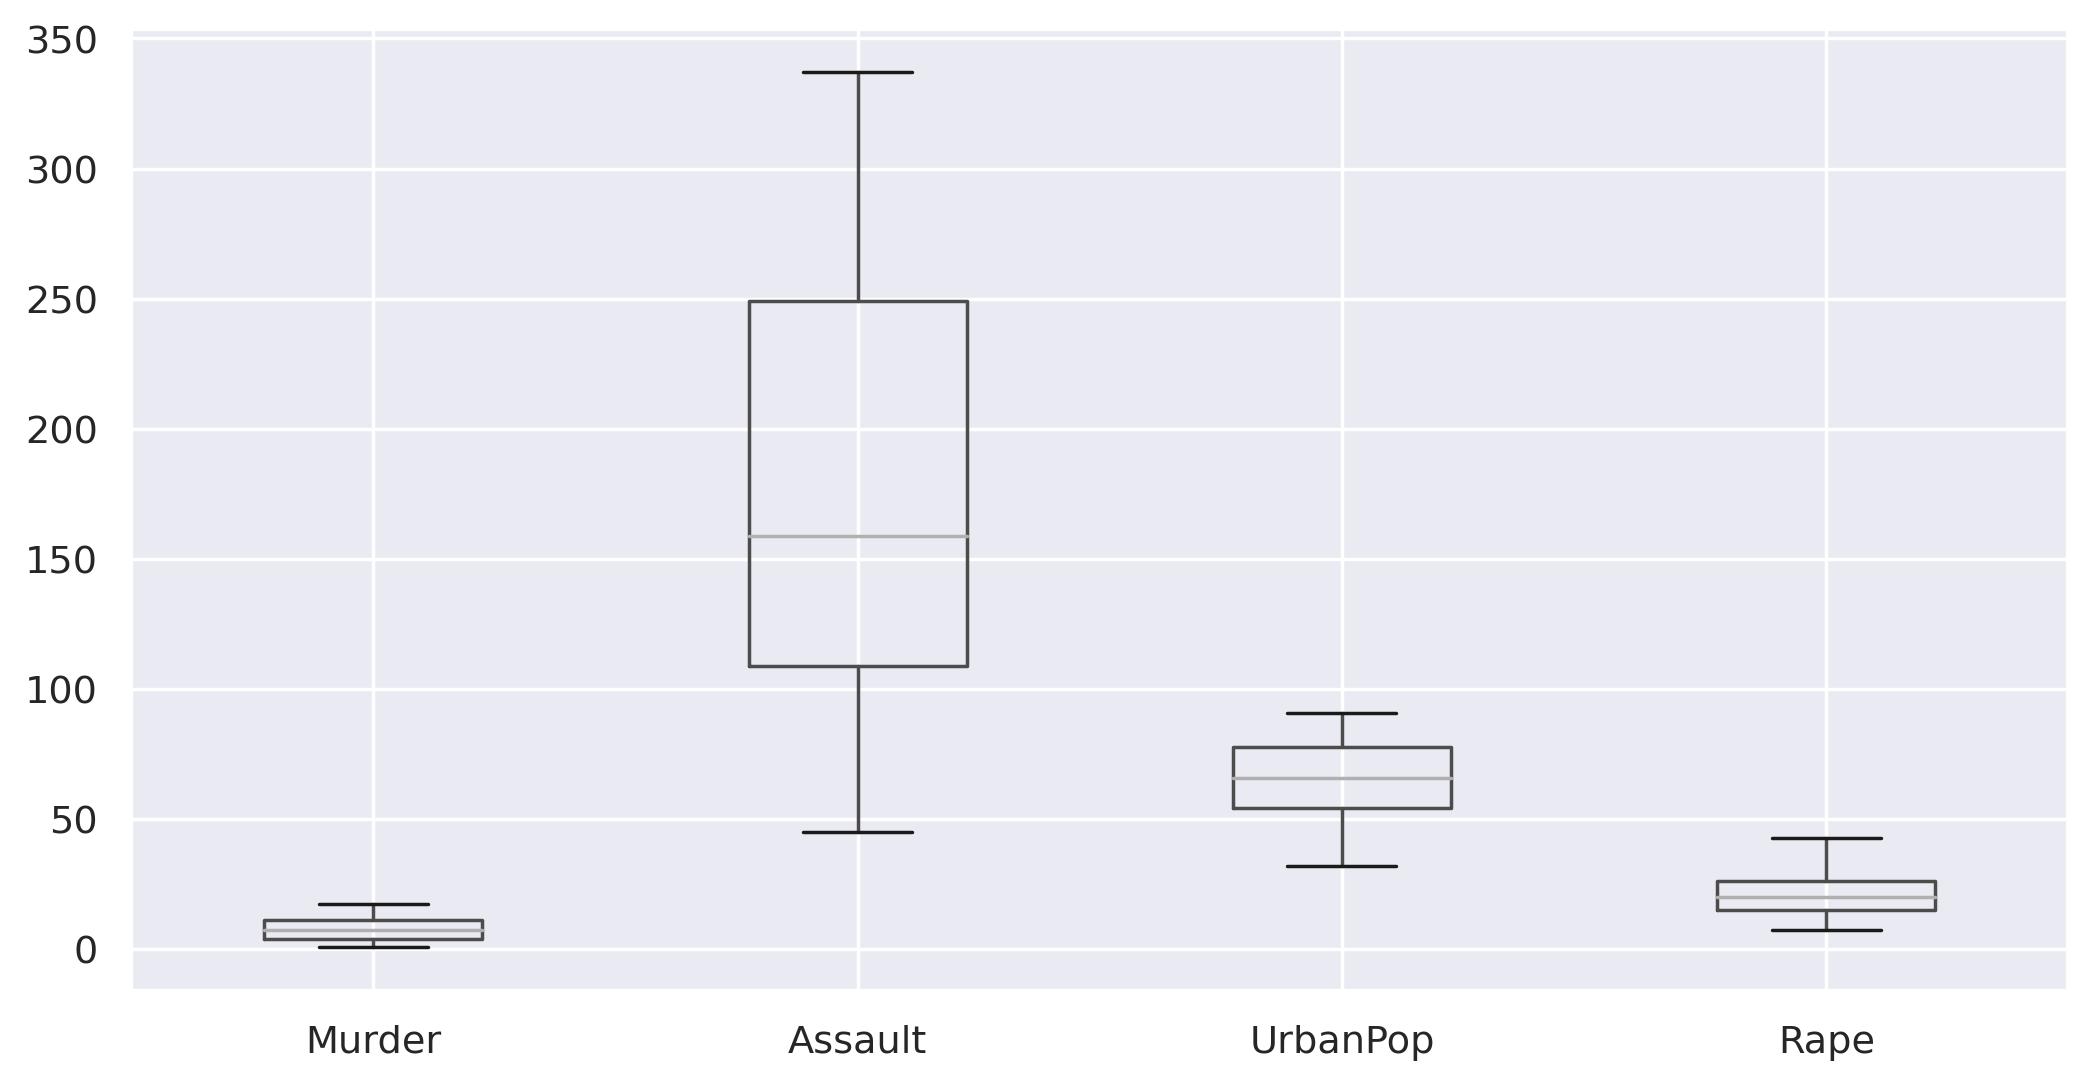

In [ ]:
df.boxplot()

# hierarchial clustering

# Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()

x = sc.fit_transform(df)
x

array([[ 1.25517927,  0.79078716, -0.52619514,  0.00719922],
       [ 0.51301858,  1.11805959, -1.22406668,  2.40232482],
       [ 0.07236067,  1.49381682,  1.00912225,  1.0926203 ],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18108811],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.15588993],
       [ 0.02597562,  0.40290872,  0.86954794,  1.94545115],
       [-1.04088037, -0.73648418,  0.79976079, -1.11144904],
       [-0.43787481,  0.81502956,  0.45082502, -0.59088995],
       [ 1.76541475,  1.99078607,  1.00912225,  1.19230183],
       [ 2.22926518,  0.48775713, -0.38662083,  0.51668259],
       [-0.57702994, -1.51224105,  1.21848371, -0.10355803],
       [-1.20322802, -0.61527217, -0.80534376, -0.76810155],
       [ 0.60578867,  0.94836277,  1.21848371,  0.31731953],
       [-0.13637203, -0.70012057, -0.03768506, -0.01495223],
       [-1.29599811, -1.39102904, -0.5959823 , -1.08929758],
       [-0.41468229, -0.67587817,  0.03210209, -0.34722399],
       [ 0.44344101, -0.

In [ ]:
#Dendrogram with single and complete linkage

In [ ]:
from scipy.cluster import hierarchy

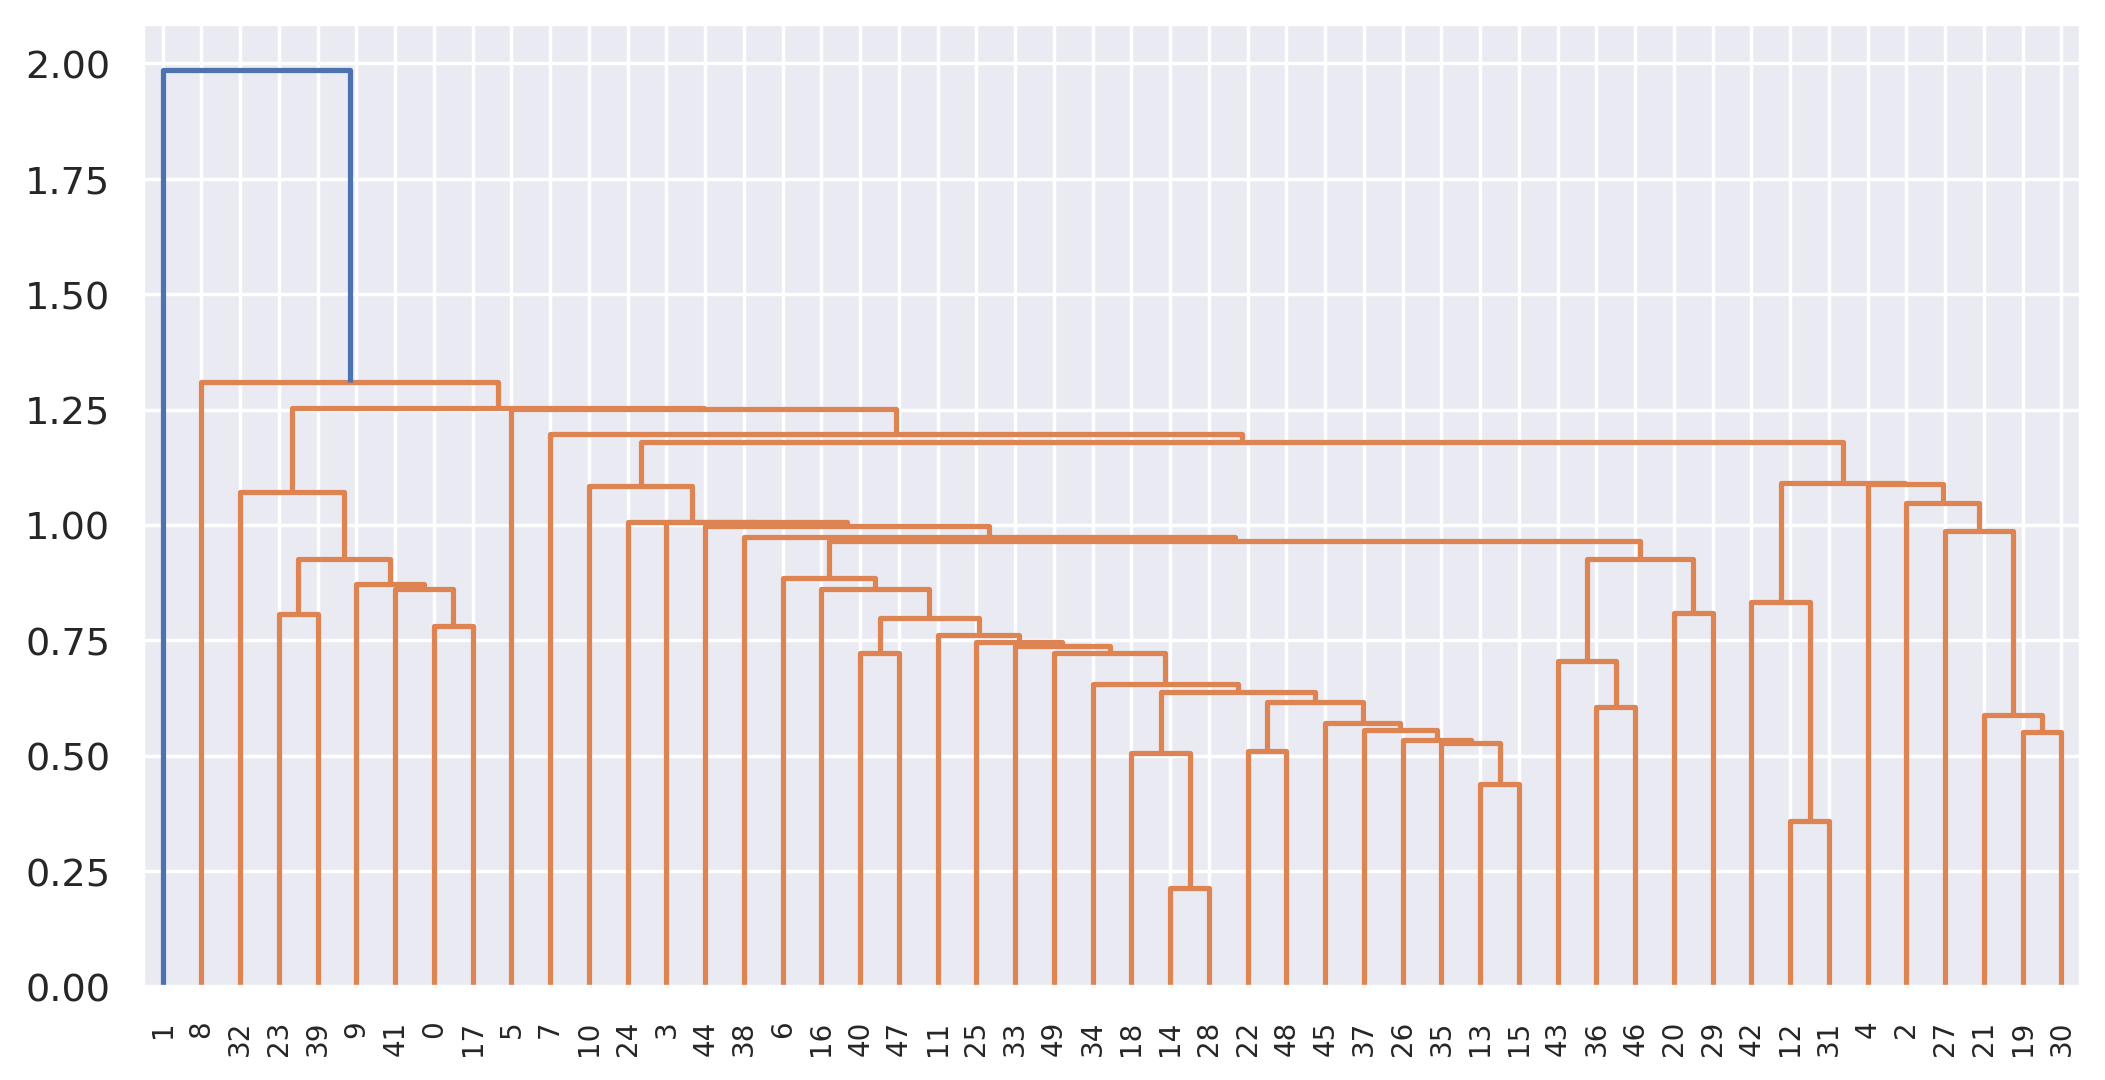

In [ ]:
lk = hierarchy.linkage(x, method='single')
dendrogram = hierarchy.dendrogram(lk)

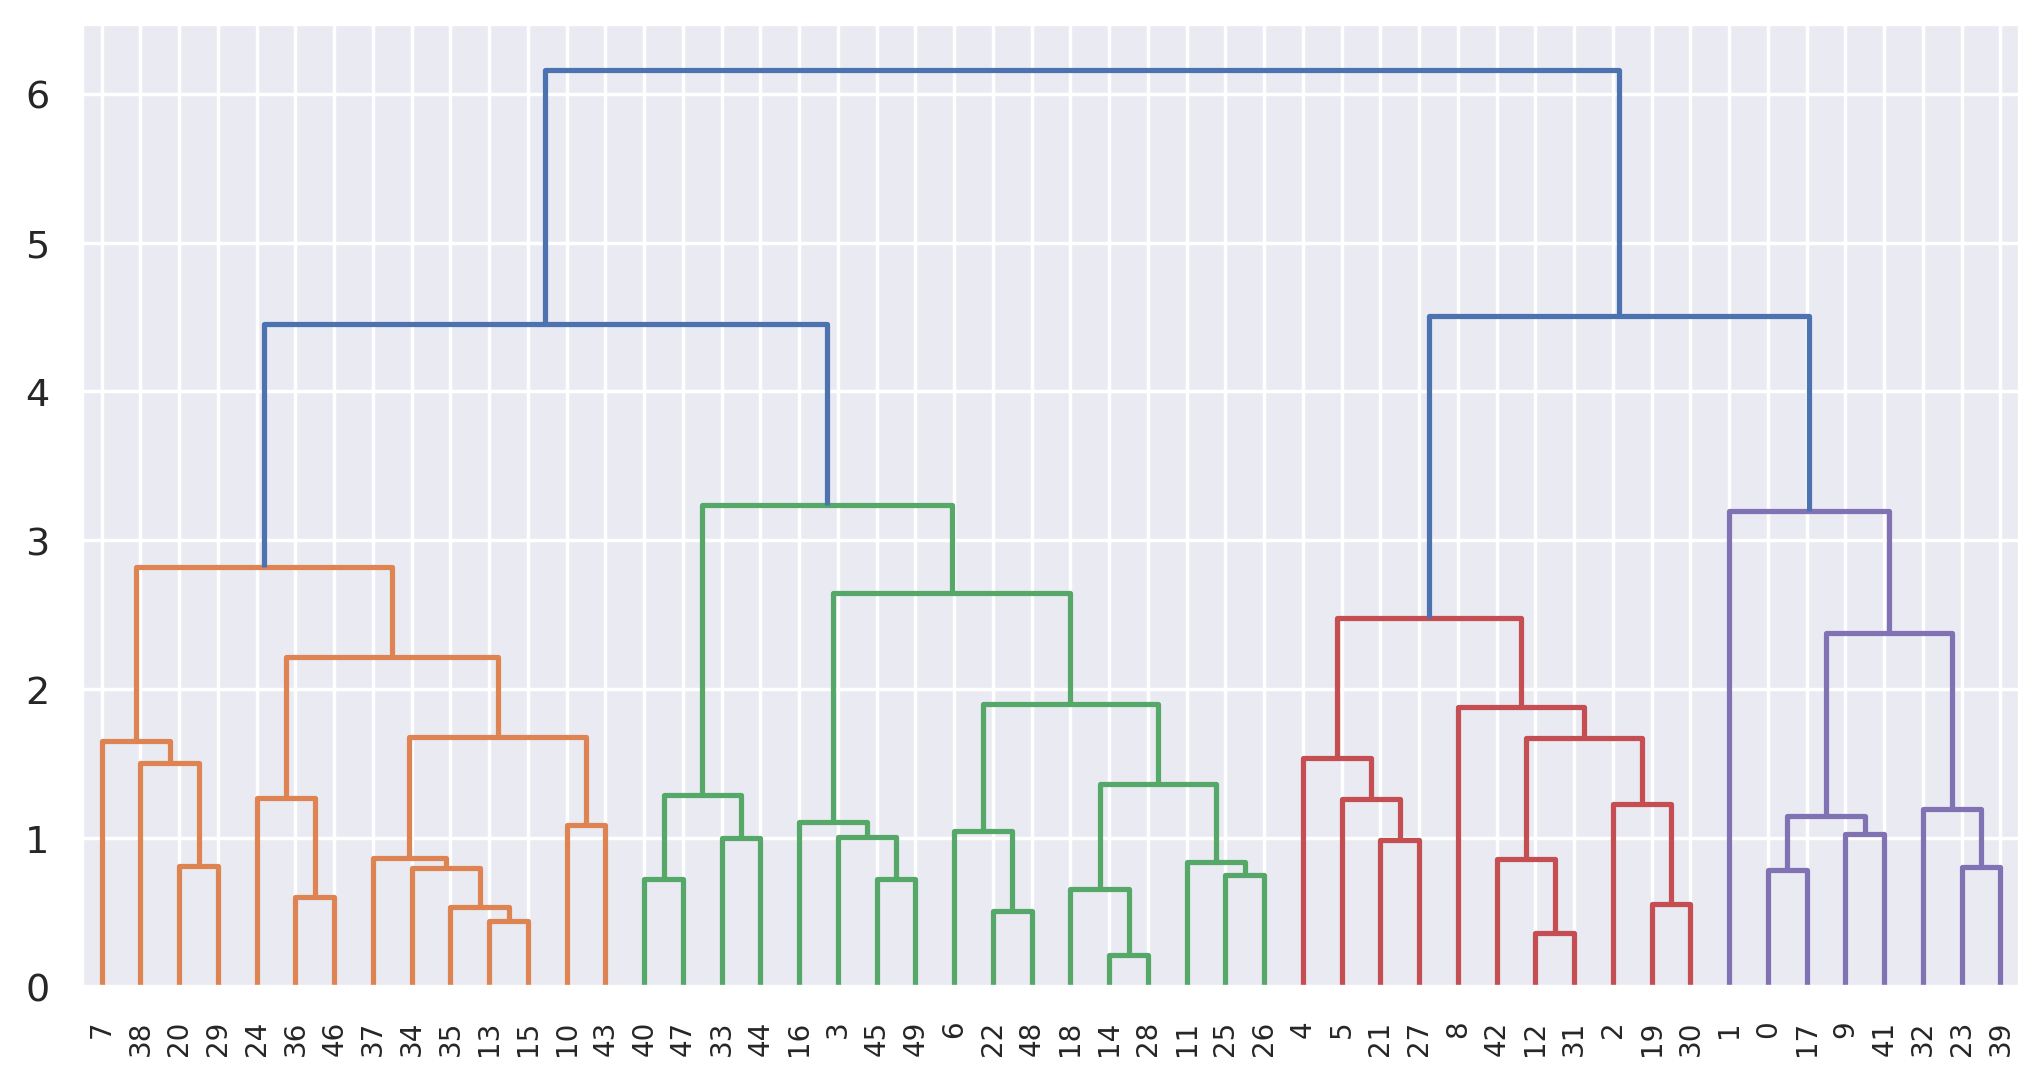

In [ ]:
lk = hierarchy.linkage(x, method='complete')
dendrogram = hierarchy.dendrogram(lk)
plt.axhline(y = 7, linestyle = '--', color = 'red')

# Model Building

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
hc = AgglomerativeClustering(n_clusters=2)

ypred = hc.fit_predict(x)
ypred

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0])

In [ ]:
df

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.200
1,10.0,263,48,42.825
2,8.1,294,80,31.000
3,8.8,190,50,19.500
4,9.0,276,91,40.600
5,7.9,204,78,38.700
6,3.3,110,77,11.100
7,5.9,238,72,15.800
8,15.4,335,80,31.900
9,17.4,211,60,25.800


In [ ]:
df['cluster'] = ypred
df

,Murder,Assault,UrbanPop,Rape,cluster
0,13.2,236,58,21.200,1
1,10.0,263,48,42.825,1
2,8.1,294,80,31.000,1
3,8.8,190,50,19.500,0
4,9.0,276,91,40.600,1
5,7.9,204,78,38.700,1
6,3.3,110,77,11.100,0
7,5.9,238,72,15.800,0
8,15.4,335,80,31.900,1
9,17.4,211,60,25.800,1


In [ ]:
df[df['cluster']==0].mean()

Murder        5.003226
Assault     116.483871
UrbanPop     63.838710
Rape         16.338710
cluster       0.000000
dtype: float64

In [ ]:
df[df['cluster'] == 1]

,Murder,Assault,UrbanPop,Rape,cluster
0,13.2,236,58,21.200,1
1,10.0,263,48,42.825,1
2,8.1,294,80,31.000,1
4,9.0,276,91,40.600,1
5,7.9,204,78,38.700,1
8,15.4,335,80,31.900,1
9,17.4,211,60,25.800,1
12,10.4,249,83,24.000,1
17,15.4,249,66,22.200,1
19,11.3,300,67,27.800,1


In [ ]:
#Analyzing the clusters

In [ ]:
df.groupby('cluster').agg('mean')

,Murder,Assault,UrbanPop,Rape
cluster,,,,
0,5.003226,116.483871,63.838710,16.338710
1,12.331579,259.315789,68.315789,28.960526


# 4 Cluster

In [ ]:
hc = AgglomerativeClustering(n_clusters=4)
yp = hc.fit_predict(x)
yp

array([3, 1, 1, 0, 1, 1, 0, 0, 1, 3, 0, 2, 1, 0, 2, 0, 0, 3, 2, 1, 0, 1,
       2, 3, 0, 2, 2, 1, 2, 0, 1, 1, 3, 2, 0, 0, 0, 0, 0, 3, 2, 3, 1, 0,
       2, 0, 0, 2, 2, 0])

In [ ]:
df=pd.read_csv("crime_data.csv")
df['Cluster'] = yp
df

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,Cluster
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,1
9,Georgia,17.4,211,60,25.8,3


In [ ]:
# Identify columns with 'object' data type
object_columns = df.select_dtypes(include=['object']).columns

# Convert object columns to numeric type if possible
df[object_columns] = df[object_columns].apply(pd.to_numeric, errors='coerce')


In [ ]:
# Group by 'Cluster' and calculate the mean
df.groupby('Cluster').mean()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
Cluster,,,,,
0,NaN,6.210526,142.052632,71.263158,19.184211
1,NaN,10.966667,264.000000,76.500000,33.608333
2,NaN,3.091667,76.000000,52.083333,11.833333
3,NaN,14.671429,251.285714,54.285714,21.685714


<Axes: xlabel='Murder', ylabel='Rape'>

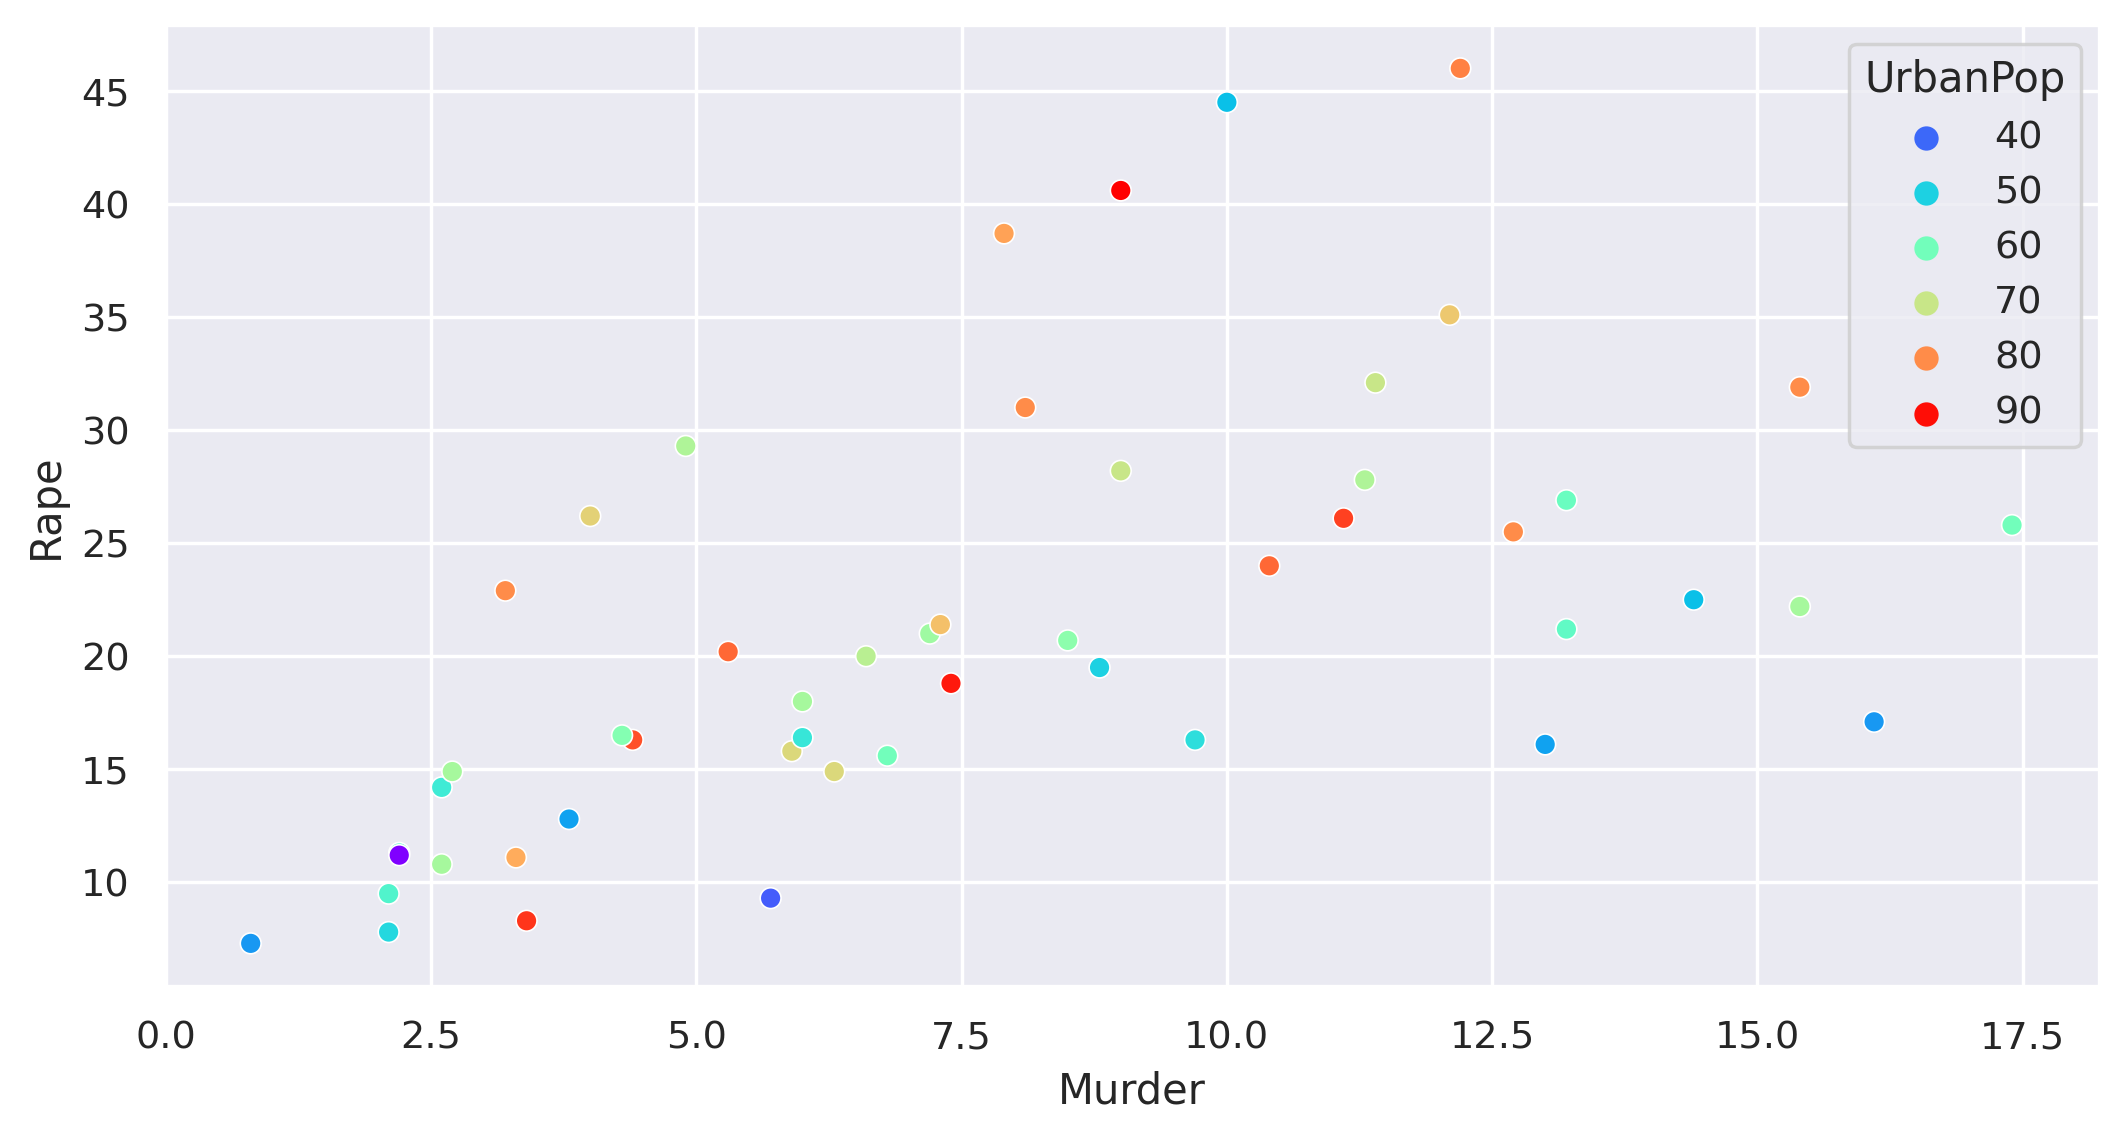

In [ ]:
sns.scatterplot(x=df['Murder'], y=df['Rape'], hue=df['UrbanPop'], palette='rainbow')


In [ ]:
from sklearn.metrics import silhouette_score

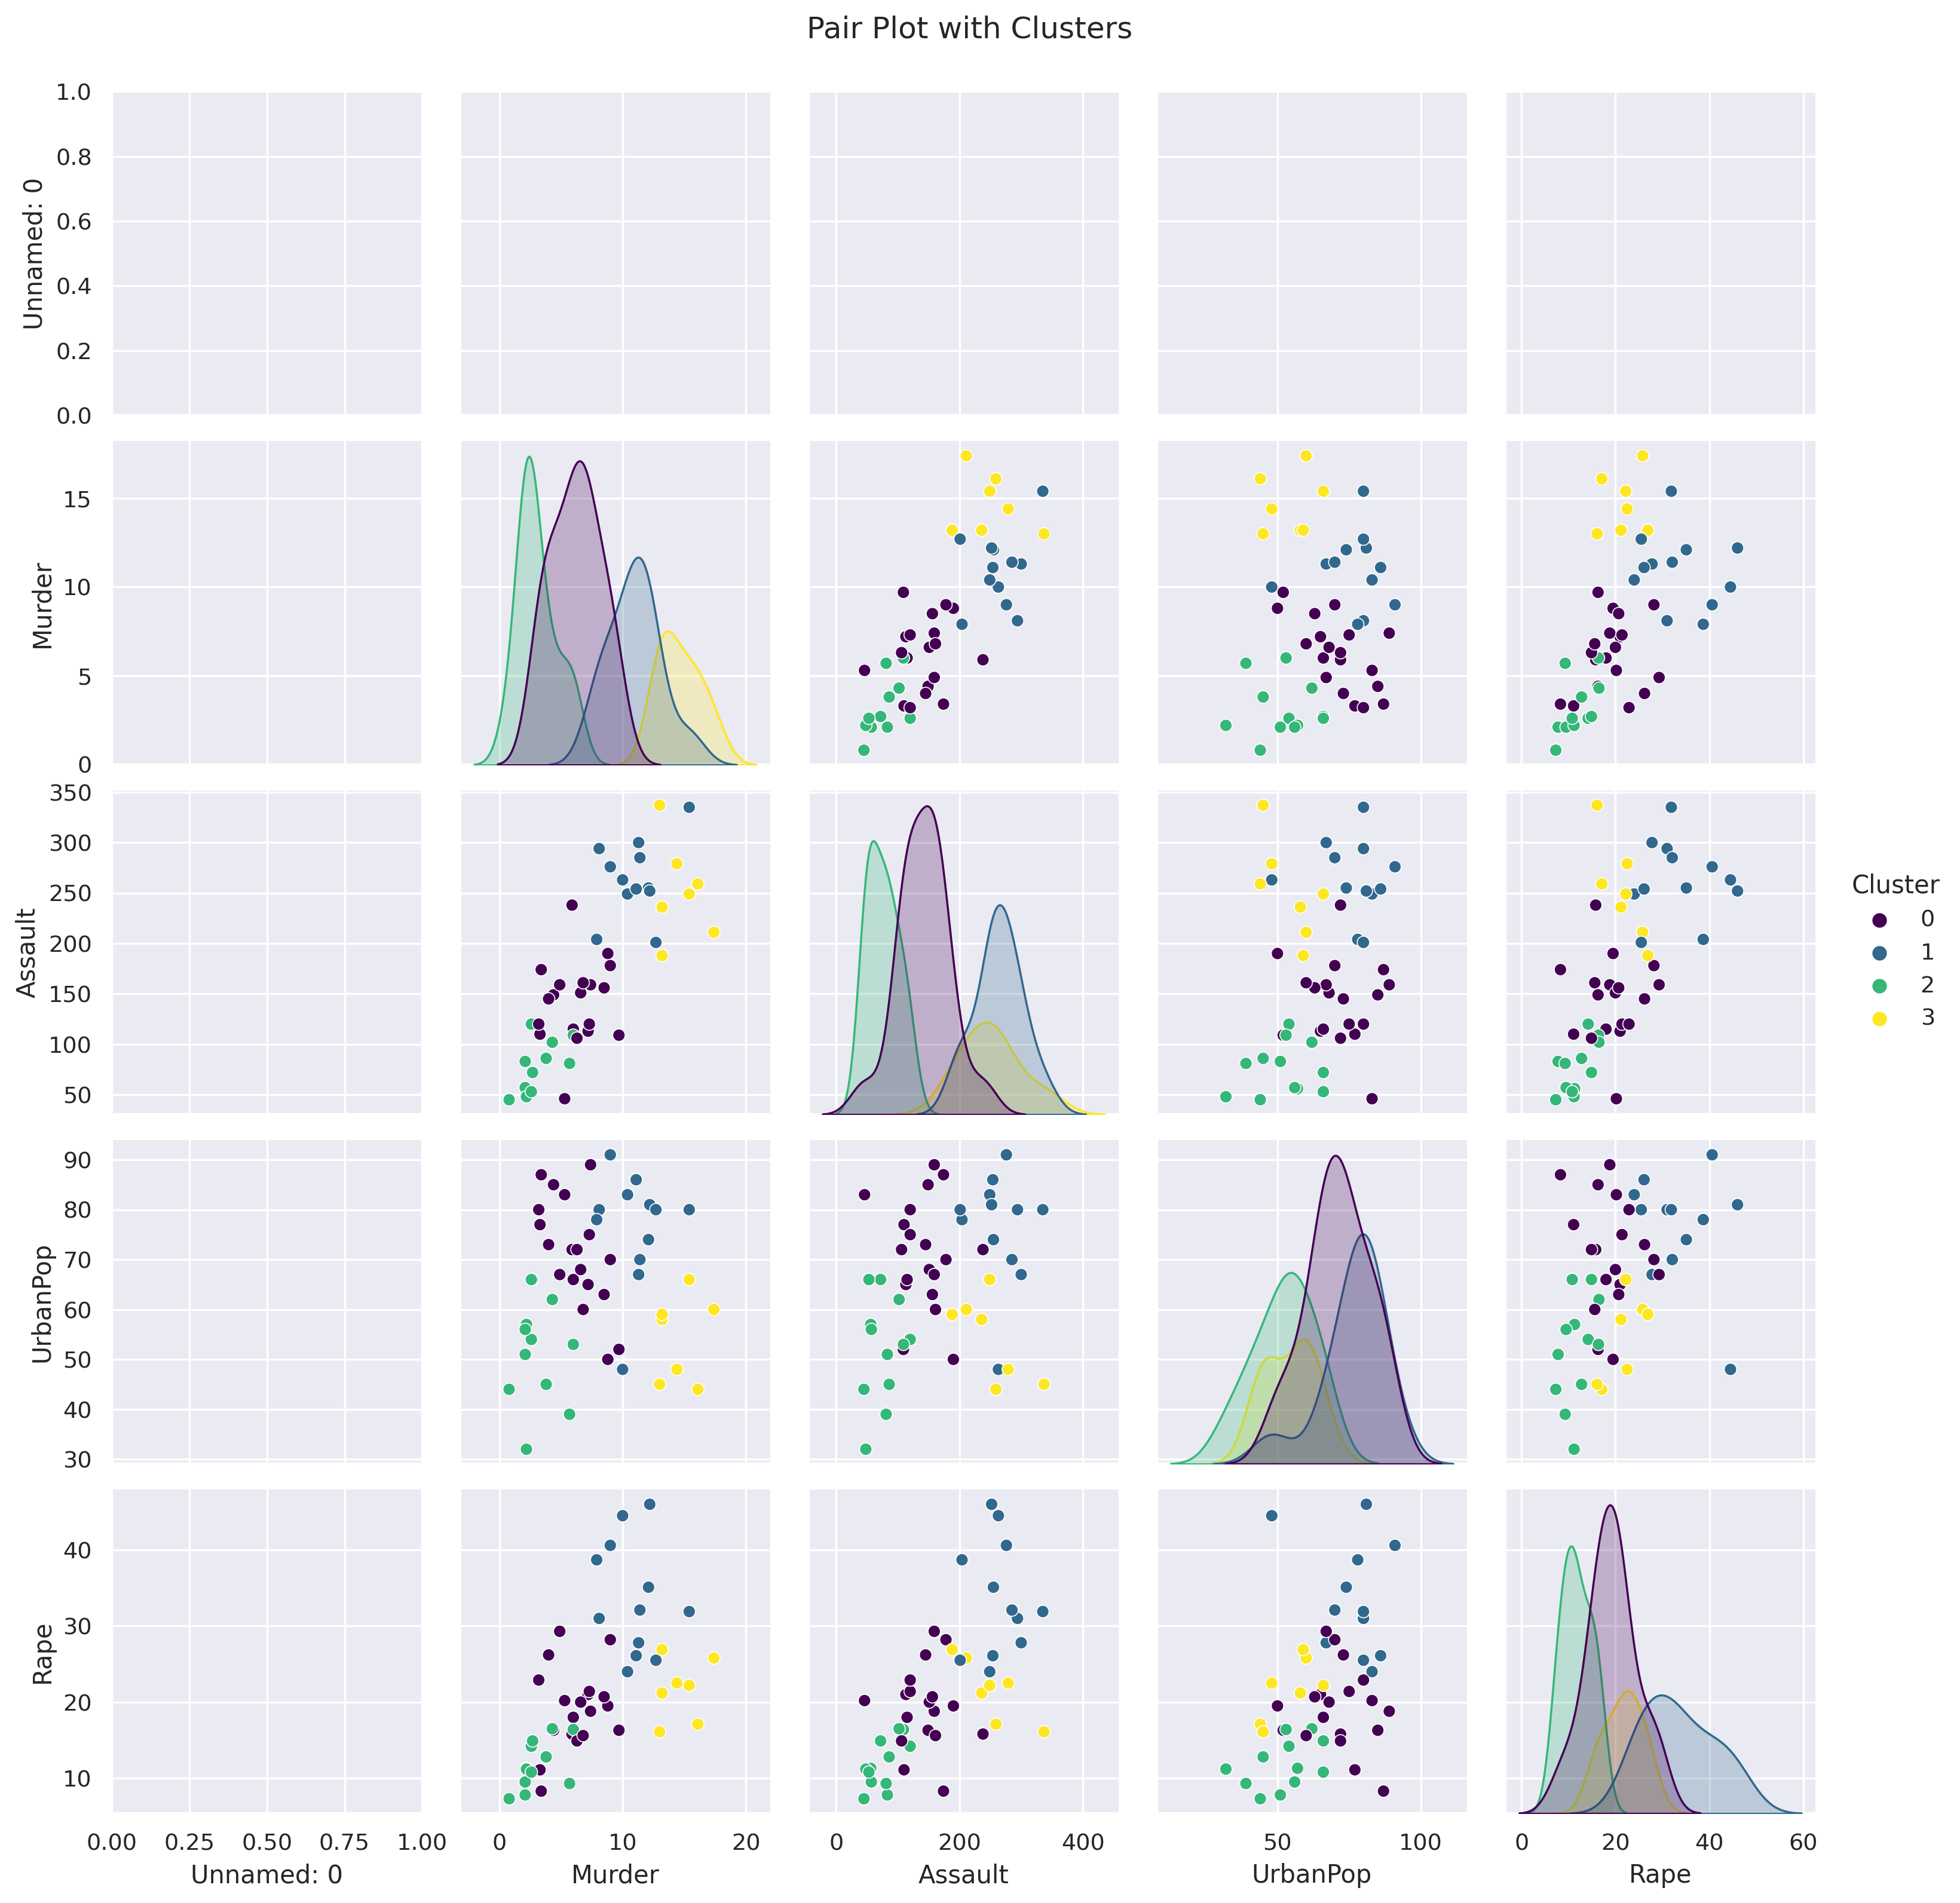

In [ ]:
#Draw the inferences from the clusters obtained.
# Create a pair plot with hue as the cluster labels
sns.pairplot(df, hue='Cluster', palette='viridis')
plt.suptitle('Pair Plot with Clusters', y=1.02)
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
X, labels = make_blobs(n_samples=49, centers=4, random_state=42)

# Calculate Silhouette Score
silhouette_avg = silhouette_score(X, labels)

# Print the result
print(f'Silhouette Score: {silhouette_avg:.4f}')


Silhouette Score: 0.8029


# k-means clustering

In [ ]:
df=pd.read_csv("crime_data.csv")
df

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [ ]:
# Drop the 'Unnamed: 0' column if it's not needed for clustering
df = df.drop(columns=['Unnamed: 0'])
df

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [ ]:
# In this example, let's use 'Murder', 'Assault', 'Urban Pop', and 'Rape' as features
X = df[['Murder', 'Assault', 'UrbanPop', 'Rape']]


In [ ]:
# Standardize the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

# Select the top 3 features based on ANOVA F-statistic
k_best = SelectKBest(f_classif, k=3)



In [ ]:
X_selected = k_best.fit_transform(X_scaled, df['Rape'])


In [ ]:
#Standardization
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()

x = sc.fit_transform(df)
x

array([[        nan,  1.25517927,  0.79078716, -0.52619514, -0.00345116,
         1.72666897],
       [        nan,  0.51301858,  1.11805959, -1.22406668,  2.50942392,
        -0.12996433],
       [        nan,  0.07236067,  1.49381682,  1.00912225,  1.05346626,
        -0.12996433],
       [        nan,  0.23470832,  0.23321191, -1.08449238, -0.18679398,
        -1.05828098],
       [        nan,  0.28109336,  1.2756352 ,  1.77678094,  2.08881393,
        -0.12996433],
       [        nan,  0.02597562,  0.40290872,  0.86954794,  1.88390137,
        -0.12996433],
       [        nan, -1.04088037, -0.73648418,  0.79976079, -1.09272319,
        -1.05828098],
       [        nan, -0.43787481,  0.81502956,  0.45082502, -0.58583422,
        -1.05828098],
       [        nan,  1.76541475,  1.99078607,  1.00912225,  1.1505301 ,
        -0.12996433],
       [        nan,  2.22926518,  0.48775713, -0.38662083,  0.49265293,
         1.72666897],
       [        nan, -0.57702994, -1.51224105,  1.

In [ ]:
#Model Building

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,Cluster
0,NaN,13.2,236,58,21.2,3
1,NaN,10.0,263,48,44.5,1
2,NaN,8.1,294,80,31.0,1
3,NaN,8.8,190,50,19.5,0
4,NaN,9.0,276,91,40.6,1


In [ ]:
km = KMeans()
yp = km.fit_predict(X)
yp

array([3, 3, 1, 6, 1, 6, 4, 3, 5, 6, 7, 4, 3, 4, 7, 4, 4, 3, 2, 1, 0, 3,
       7, 3, 0, 4, 4, 3, 7, 0, 1, 3, 5, 7, 4, 0, 0, 4, 0, 1, 2, 6, 6, 4,
       7, 0, 0, 2, 7, 0], dtype=int32)

In [ ]:
len(yp)

50

In [ ]:
#cluster centre
km.cluster_centers_

array([[  6.11111111, 159.11111111,  73.55555556,  20.37777778],
       [ 10.84      , 286.8       ,  71.2       ,  30.8       ],
       [  3.86666667,  83.33333333,  45.        ,   9.96666667],
       [ 11.82222222, 250.55555556,  68.        ,  28.        ],
       [  5.59      , 112.4       ,  65.6       ,  17.27      ],
       [ 14.2       , 336.        ,  62.5       ,  24.        ],
       [ 12.        , 198.8       ,  65.4       ,  27.28      ],
       [  2.55714286,  53.85714286,  57.71428571,  12.17142857]])

In [ ]:
x

array([[        nan,  1.25517927,  0.79078716, -0.52619514, -0.00345116,
         1.72666897],
       [        nan,  0.51301858,  1.11805959, -1.22406668,  2.50942392,
        -0.12996433],
       [        nan,  0.07236067,  1.49381682,  1.00912225,  1.05346626,
        -0.12996433],
       [        nan,  0.23470832,  0.23321191, -1.08449238, -0.18679398,
        -1.05828098],
       [        nan,  0.28109336,  1.2756352 ,  1.77678094,  2.08881393,
        -0.12996433],
       [        nan,  0.02597562,  0.40290872,  0.86954794,  1.88390137,
        -0.12996433],
       [        nan, -1.04088037, -0.73648418,  0.79976079, -1.09272319,
        -1.05828098],
       [        nan, -0.43787481,  0.81502956,  0.45082502, -0.58583422,
        -1.05828098],
       [        nan,  1.76541475,  1.99078607,  1.00912225,  1.1505301 ,
        -0.12996433],
       [        nan,  2.22926518,  0.48775713, -0.38662083,  0.49265293,
         1.72666897],
       [        nan, -0.57702994, -1.51224105,  1.

In [ ]:
#Visualize the clusters
x[:,1]

array([ 0.79078716,  1.11805959,  1.49381682,  0.23321191,  1.2756352 ,
        0.40290872, -0.73648418,  0.81502956,  1.99078607,  0.48775713,
       -1.51224105, -0.61527217,  0.94836277, -0.70012057, -1.39102904,
       -0.67587817, -0.74860538,  0.94836277, -1.06375661,  1.56654403,
       -0.26375734,  1.02108998, -1.19708982,  1.06957478,  0.0877575 ,
       -0.74860538, -0.83345379,  0.98472638, -1.37890783, -0.14254532,
        1.38472601,  1.00896878,  2.01502847, -1.52436225, -0.61527217,
       -0.23951493, -0.14254532, -0.78496898,  0.03927269,  1.3119988 ,
       -1.027393  ,  0.20896951,  0.36654512, -0.61527217, -1.48799864,
       -0.17890893, -0.31224214, -1.08799901, -1.42739264, -0.11830292])

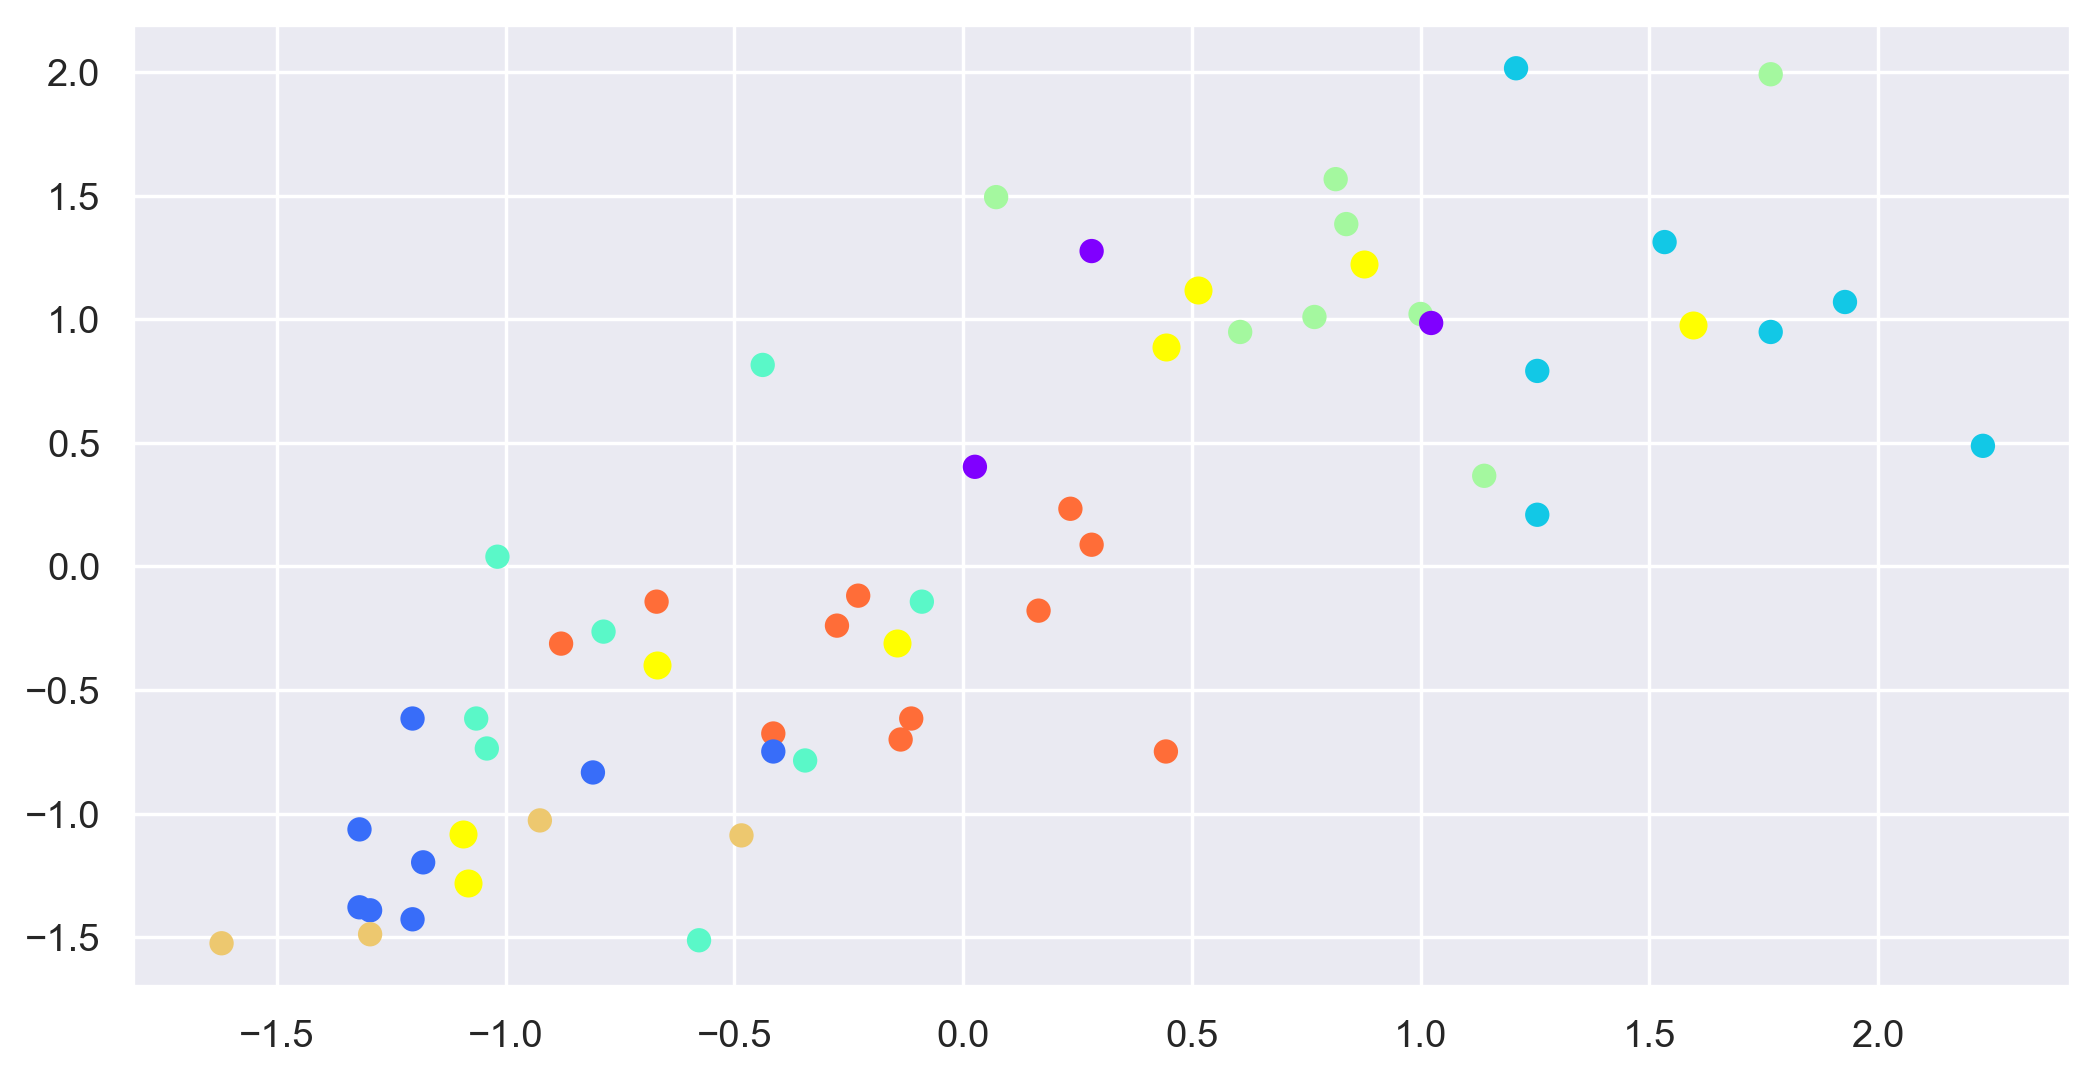

In [ ]:
plt.scatter(x[:,0],x[:,1], c = yp, cmap='rainbow')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], c = 'yellow', s = 50)

In [ ]:
km.inertia_

34.84537932120002

In [ ]:
#Elbow graph

In [ ]:
wcss = []

for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit_predict(x)
    wcss.append(km.inertia_)

In [ ]:
wcss

[200.0,
 104.96163315756871,
 80.08569526137276,
 57.55425863091104,
 50.32802224604082,
 44.52136573108119,
 40.37237864618049,
 34.68738839784909,
 31.58765012022205,
 28.66578646753262]

Text(0.5, 1.0, 'Elbow Graph')

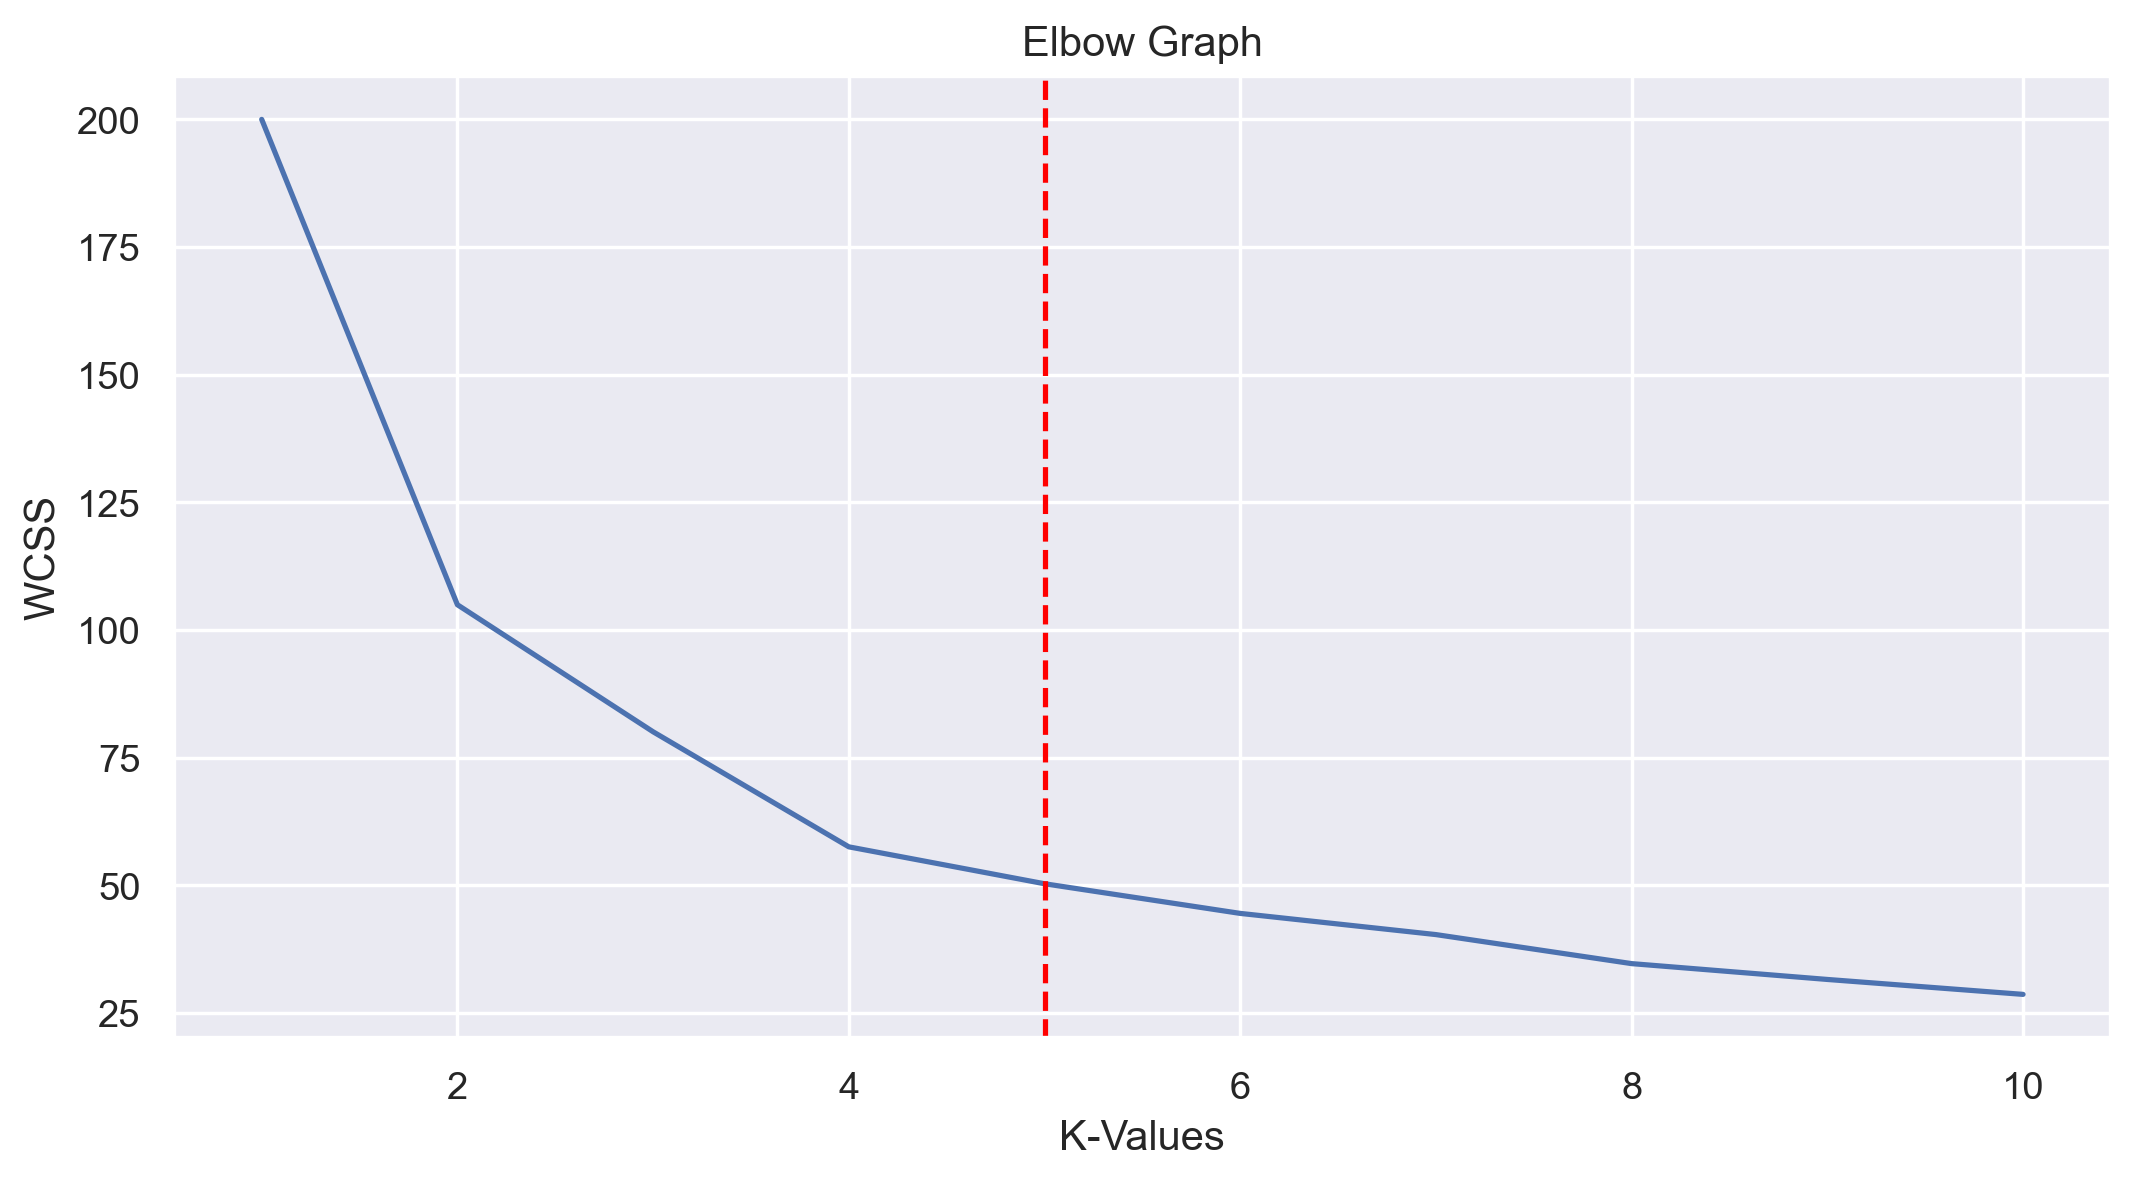

In [ ]:
plt.plot(range(1,11),wcss)
plt.axvline(x = 5, linestyle = '--', color = 'red')
plt.xlabel('K-Values')
plt.ylabel('WCSS')
plt.title('Elbow Graph')

In [ ]:
#Final Model

In [ ]:
km = KMeans(n_clusters=5)
ypred = km.fit_predict(x)
ypred

array([3, 1, 1, 2, 1, 1, 0, 2, 1, 3, 0, 4, 1, 2, 4, 2, 2, 3, 4, 1, 0, 1,
       0, 3, 2, 2, 2, 1, 4, 0, 1, 1, 3, 4, 2, 2, 2, 0, 0, 3, 4, 3, 1, 0,
       4, 2, 2, 4, 0, 2])

In [ ]:
#Visualize the clusters

In [ ]:
km.cluster_centers_

array([[-0.8115321 , -0.73783098,  0.89281033, -0.63376699],
       [ 0.73721295,  1.13018079,  0.76486721,  1.33477166],
       [-0.23245533, -0.29838934, -0.10747222, -0.09512257],
       [ 1.59644066,  0.97606837, -0.78540457,  0.0489325 ],
       [-1.18293457, -1.19708982, -1.27640705, -1.16552107]])

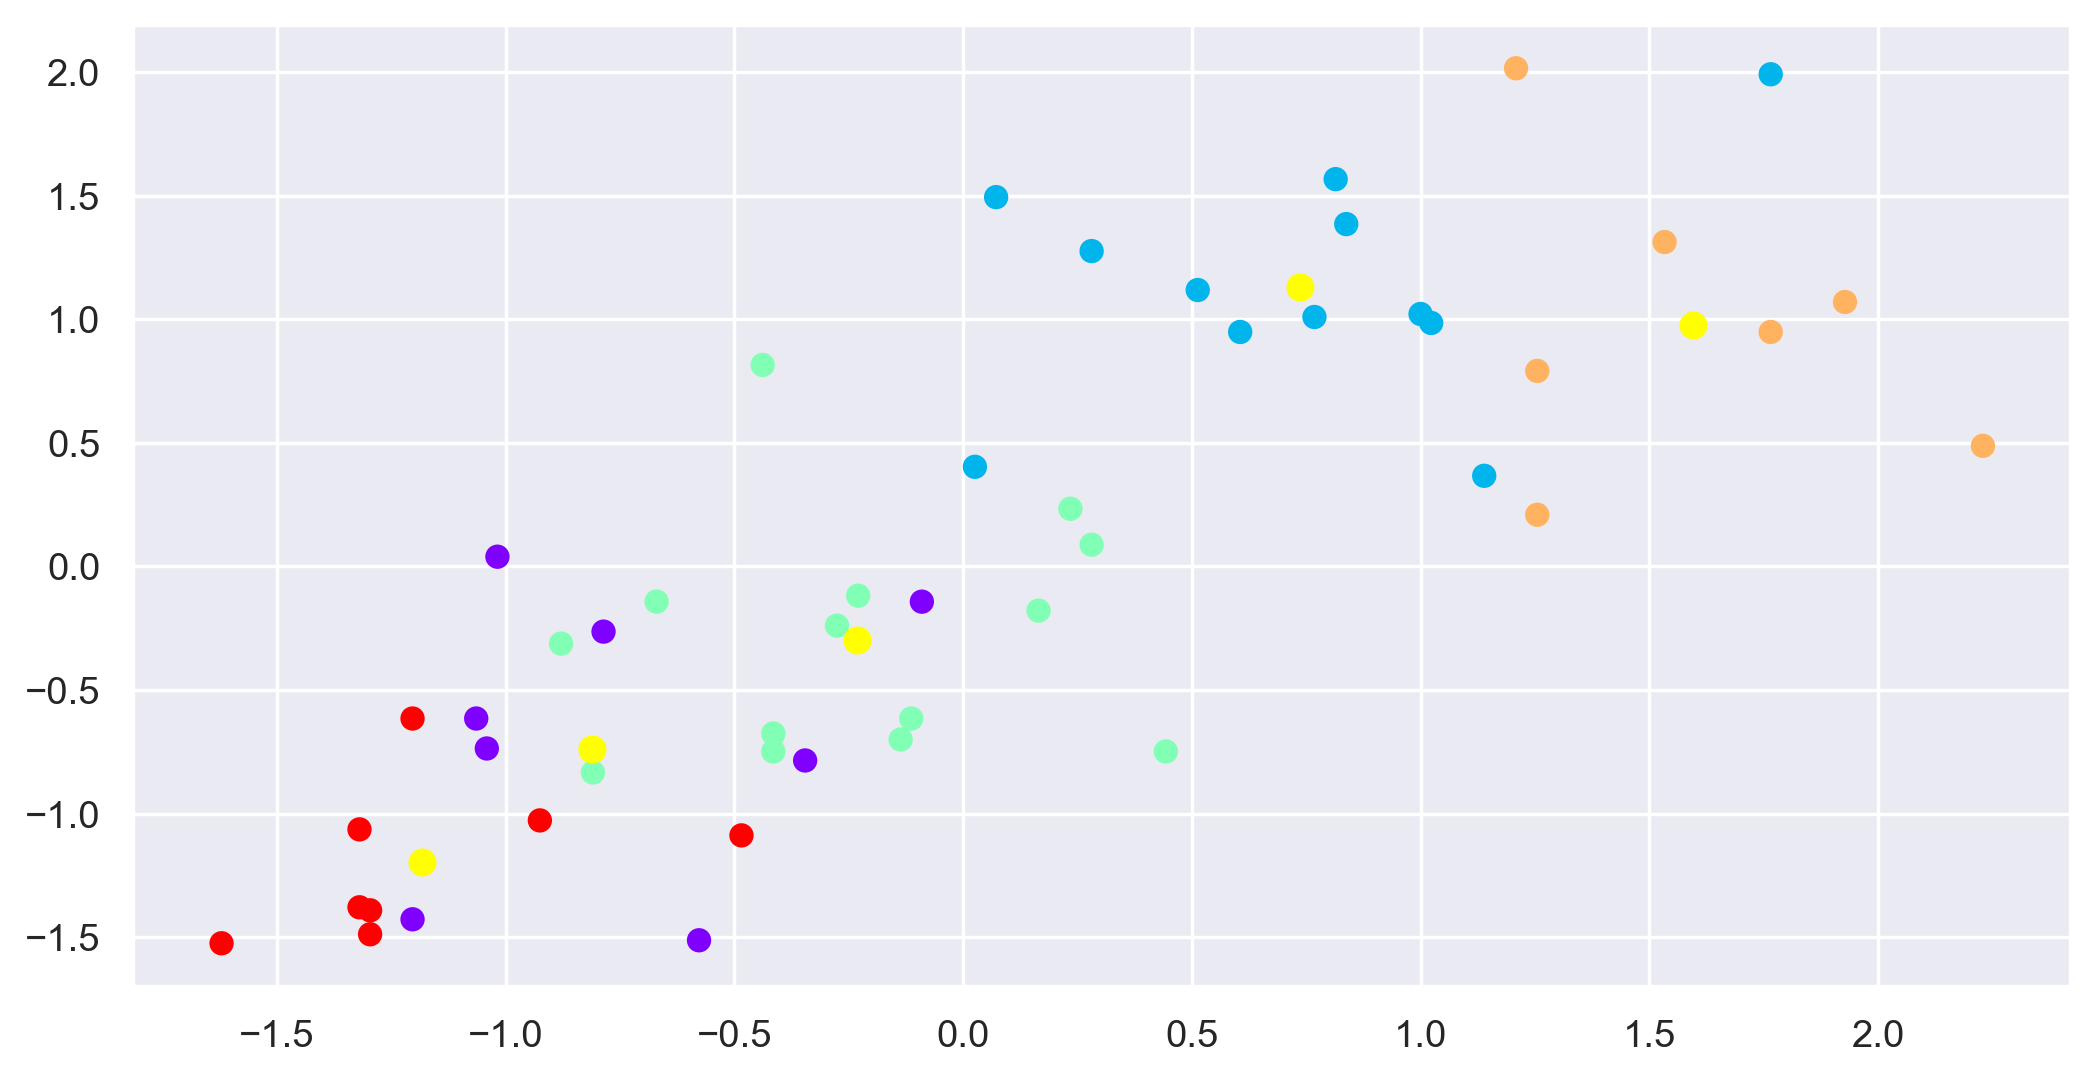

In [ ]:
plt.scatter(x[:,0],x[:,1], c = ypred, cmap='rainbow')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], c = 'yellow',s = 50)

In [ ]:
#Analyzing clusters
df['cluster'] = ypred
df

,Murder,Assault,UrbanPop,Rape,cluster
0,13.2,236,58,21.2,3
1,10.0,263,48,44.5,1
2,8.1,294,80,31.0,1
3,8.8,190,50,19.5,2
4,9.0,276,91,40.6,1
5,7.9,204,78,38.7,1
6,3.3,110,77,11.1,0
7,5.9,238,72,15.8,2
8,15.4,335,80,31.9,1
9,17.4,211,60,25.8,3


In [ ]:
df[df['cluster'] == 0].mean()
df[df['cluster'] == 1].mean()

Murder       10.966667
Assault     264.000000
UrbanPop     76.500000
Rape         33.608333
cluster       1.000000
dtype: float64

In [ ]:
df.groupby('cluster').agg('mean')

,Murder,Assault,UrbanPop,Rape
cluster,,,,
0,4.288889,109.888889,78.333333,15.355556
1,10.966667,264.000000,76.500000,33.608333
2,6.785714,146.142857,64.000000,20.350000
3,14.671429,251.285714,54.285714,21.685714
4,2.687500,72.000000,47.250000,10.425000


In [ ]:
df['cluster'].value_counts()

cluster
2    14
1    12
0     9
4     8
3     7
Name: count, dtype: int64

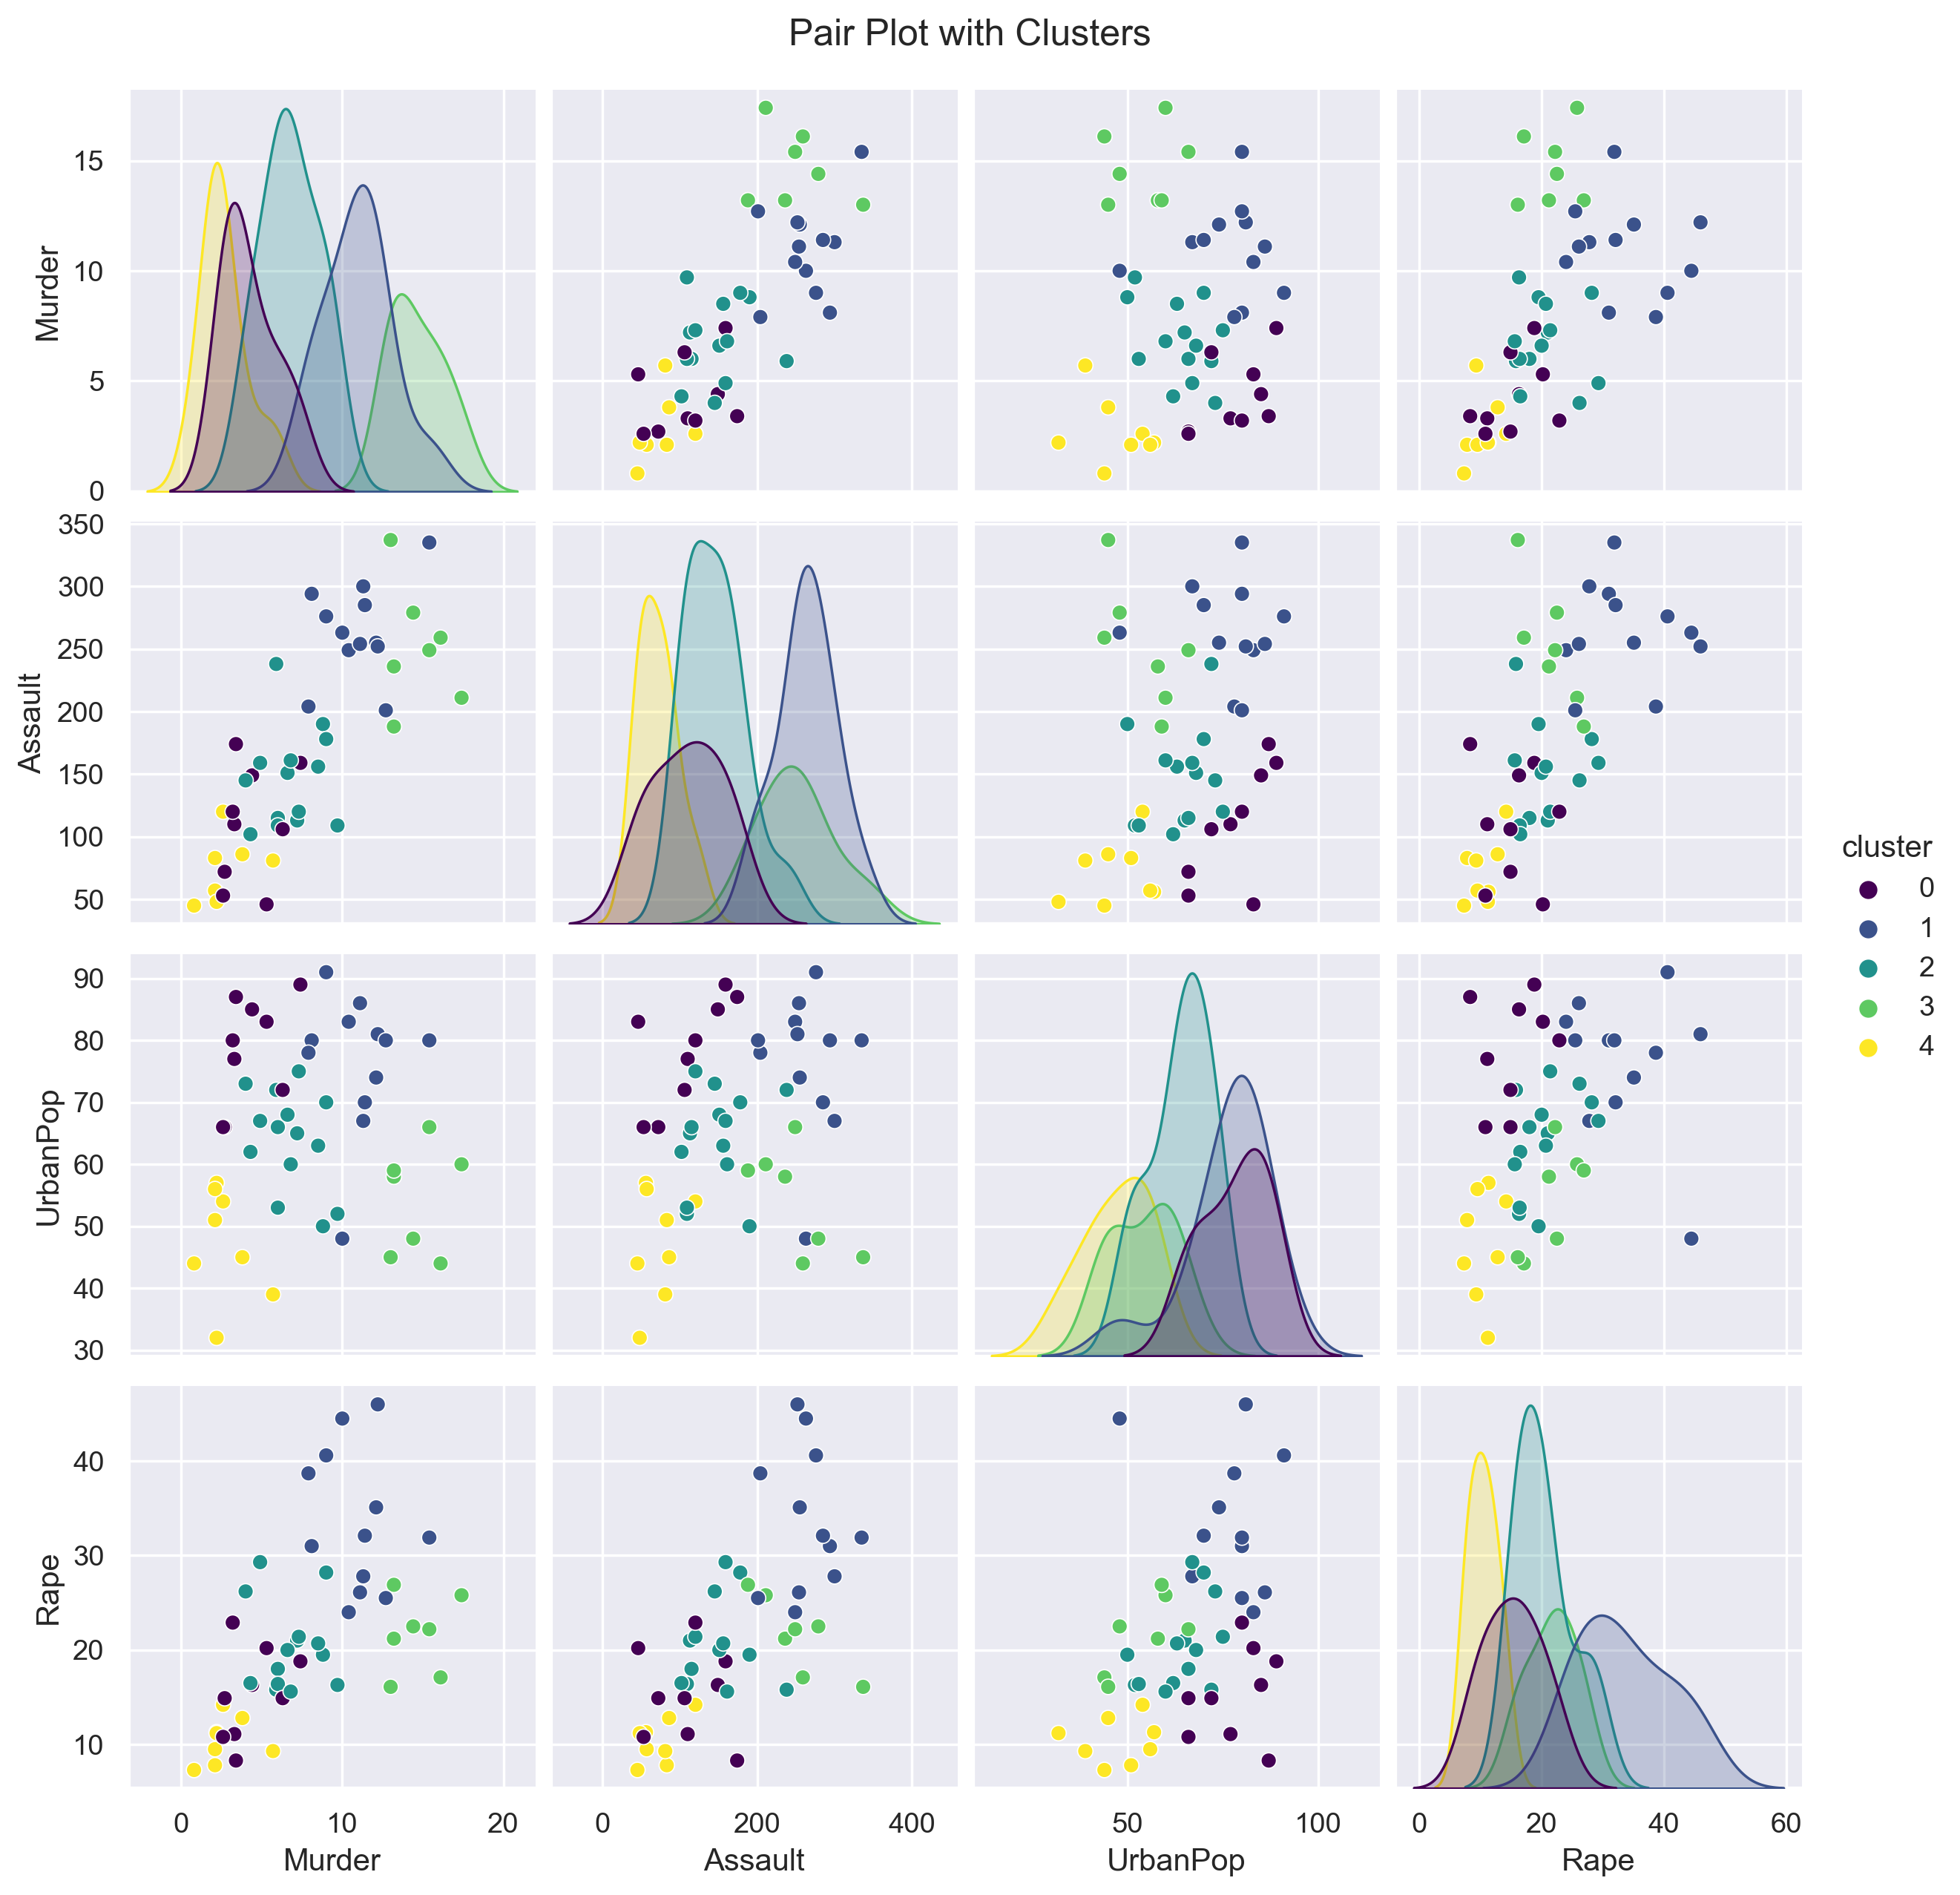

In [ ]:
#Draw the inferences from the clusters obtained.
# Create a pair plot with hue as the cluster labels
sns.pairplot(df, hue='cluster', palette='viridis')
plt.suptitle('Pair Plot with Clusters', y=1.02)
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
X, labels = make_blobs(n_samples=50, centers=5, random_state=42)

# Calculate Silhouette Score
silhouette_avg = silhouette_score(X, labels)

# Print the result
print(f'Silhouette Score: {silhouette_avg:.4f}')


Silhouette Score: 0.6688


In [ ]:
from sklearn.metrics import adjusted_mutual_info_score


# Calculate Adjusted Mutual Information
ami = adjusted_mutual_info_score(yp, yp)

# Print the result
print(f'Adjusted Mutual Information: {ami:.4f}')


Adjusted Mutual Information: 1.0000


In [ ]:
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score

# Calculate homogeneity, completeness, and V-measure
homogeneity = homogeneity_score(yp, yp)
completeness = completeness_score(yp, yp)
v_measure = v_measure_score(yp, yp)

# Print the results
print(f'Homogeneity: {homogeneity:.4f}')
print(f'Completeness: {completeness:.4f}')
print(f'V-measure: {v_measure:.4f}')


Homogeneity: 1.0000
Completeness: 1.0000
V-measure: 1.0000


In [ ]:
from sklearn.metrics import davies_bouldin_score


# Example data (replace these with your actual data)
from sklearn.datasets import make_blobs
X, labels = make_blobs(n_samples=49, centers=3, random_state=42)

# Calculate Davies-Bouldin Index
db_index = davies_bouldin_score(X, labels)

# Print the result
print(f'Davies-Bouldin Index: {db_index:.4f}')


Davies-Bouldin Index: 0.2052


In [ ]:
from sklearn.metrics import calinski_harabasz_score

# Assuming X is your data and labels is the predicted cluster labels
# Replace X and labels with your actual data

# Example data (replace these with your actual data)
from sklearn.datasets import make_blobs
X, labels = make_blobs(n_samples=49, centers=3, random_state=42)

# Calculate Calinski-Harabasz Index
ch_index = calinski_harabasz_score(X, labels)

# Print the result
print(f'Calinski-Harabasz Index: {ch_index:.4f}')


Calinski-Harabasz Index: 935.0559
